# Find the Number of Labeled Components, Area, and Integrated Density in an Image

### Domain: Earth Science

Created by: Preksha Shah

### Concepts Used

1. Labeled Components:
Labeled components refer to connected regions of similar intensity or pixel values in an image. These are identified using algorithms such as Connected Component Analysis (CCA).

2. Area:
The area is the number of pixels in a labeled component.

3. Integrated Density:
Integrated density is the sum of pixel intensities in the labeled region. It provides information about the "strength" or "weight" of the component.

In [7]:
# Required Libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os


In [8]:
def analyze_image_components(image_path):
    """
    Function to analyze the number of labeled components, their areas,
    and integrated densities in an image.

    Parameters:
    - image_path (str): Path to the input image.

    Outputs:
    - Displays visualizations for the original image, binary image, labeled components,
      and individual components.
    - Prints a table of statistics for each component.
    """
    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return

    # **Step 1: Load the Image**
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Visualize the original image
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    # **Step 2: Thresholding**
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Visualize the binary image
    plt.figure(figsize=(8, 8))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image")
    plt.axis("off")
    plt.show()

    # **Step 3: Find Labeled Components**
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

    # Display the number of labeled components
    print(f"Number of Labeled Components (excluding background): {num_labels - 1}")

    # **Step 4: Analyze Components**
    component_data = []
    for i in range(1, num_labels):  # Start from 1 to exclude the background
        area = stats[i, cv2.CC_STAT_AREA]
        integrated_density = np.sum(image[labels == i])
        centroid = centroids[i]

        component_data.append({
            "Label": i,
            "Area": area,
            "Integrated Density": integrated_density,
            "Centroid": centroid
        })

        print(f"Component {i}: Area = {area}, Integrated Density = {integrated_density}, Centroid = {centroid}")

    # **Step 5: Visualize Labeled Components**
    colored_labels = np.zeros((*labels.shape, 3), dtype=np.uint8)
    for i in range(1, num_labels):
        mask = labels == i
        colored_labels[mask] = np.random.randint(0, 255, size=3)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(colored_labels, cv2.COLOR_BGR2RGB))
    plt.title("Labeled Components")
    plt.axis("off")
    plt.show()

    # **Step 6: Insights and Statistics**
    df = pd.DataFrame(component_data)
    print("\nComponent Statistics:")
    print(df)

    # **Step 7: Visualize Individual Components**
    for i in range(1, num_labels):
        mask = labels == i
        highlighted_image = image.copy()
        highlighted_image[~mask] = 0  # Mask all other regions

        plt.figure(figsize=(6, 6))
        plt.imshow(highlighted_image, cmap='gray')
        plt.title(f"Component {i}")
        plt.axis("off")
        plt.show()

    return df

In [17]:
image_path_1 = "/content/Erosion.jpg"
image_path_2 = "/content/Metamorphic.jpg"
image_path_3 = "/content/espoircoraux.jpg"
image_path_4 = "/content/linnetreef.jpg"
image_path_5 = "/content/maxresdefault.jpg"
image_path_6 = "/content/olivine.jpg"
image_path_7 = "/content/olivine.jpg"

'''print("Analyzing Image 1:")
stats_image_1 = analyze_image_components(image_path_1)

print("\nAnalyzing Image 2:")
stats_image_2 = analyze_image_components(image_path_2)

print("Analyzing Image 1:")
stats_image_3 = analyze_image_components(image_path_1)

print("\nAnalyzing Image 2:")
stats_image_4 = analyze_image_components(image_path_2)

print("Analyzing Image 1:")
stats_image_5 = analyze_image_components(image_path_1)

print("\nAnalyzing Image 2:")
stats_image_6 = analyze_image_components(image_path_2)'''

'print("Analyzing Image 1:")\nstats_image_1 = analyze_image_components(image_path_1)\n\nprint("\nAnalyzing Image 2:")\nstats_image_2 = analyze_image_components(image_path_2)\n\nprint("Analyzing Image 1:")\nstats_image_3 = analyze_image_components(image_path_1)\n\nprint("\nAnalyzing Image 2:")\nstats_image_4 = analyze_image_components(image_path_2)\n\nprint("Analyzing Image 1:")\nstats_image_5 = analyze_image_components(image_path_1)\n\nprint("\nAnalyzing Image 2:")\nstats_image_6 = analyze_image_components(image_path_2)'


Analyzing Image 2:


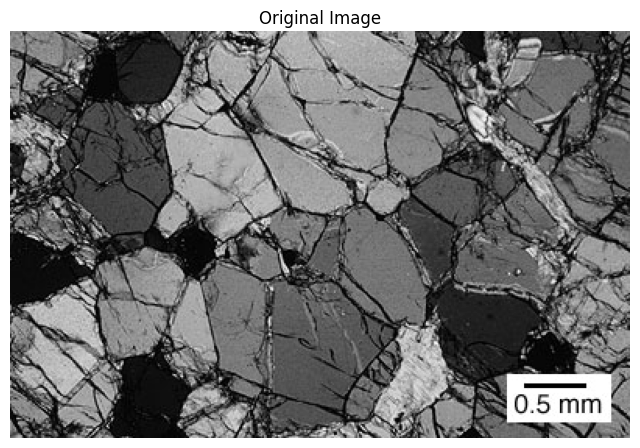

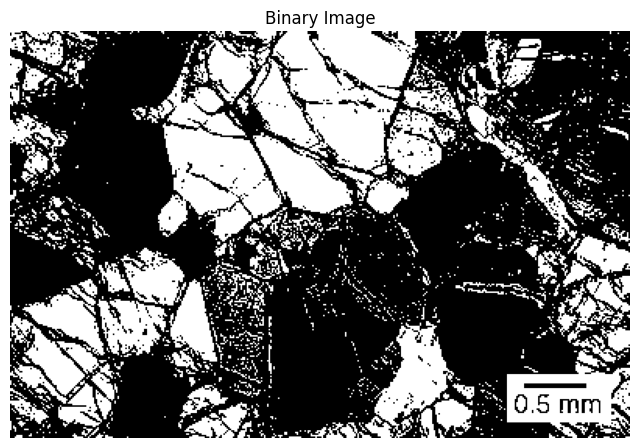

Number of Labeled Components (excluding background): 1198
Component 1: Area = 87, Integrated Density = 12196, Centroid = [4.05747126 6.37931034]
Component 2: Area = 336, Integrated Density = 47458, Centroid = [22.67261905 10.00892857]
Component 3: Area = 4, Integrated Density = 581, Centroid = [33.   0.5]
Component 4: Area = 57, Integrated Density = 9275, Centroid = [45.78947368  2.8245614 ]
Component 5: Area = 2, Integrated Density = 320, Centroid = [56.   0.5]
Component 6: Area = 1, Integrated Density = 143, Centroid = [61.  1.]
Component 7: Area = 4, Integrated Density = 596, Centroid = [68.5  0.5]
Component 8: Area = 2, Integrated Density = 273, Centroid = [77.5  0.5]
Component 9: Area = 1, Integrated Density = 130, Centroid = [82.  0.]
Component 10: Area = 3, Integrated Density = 527, Centroid = [97.66666667  0.33333333]
Component 11: Area = 1, Integrated Density = 150, Centroid = [127.   0.]
Component 12: Area = 17, Integrated Density = 2828, Centroid = [134.70588235   1.23529412

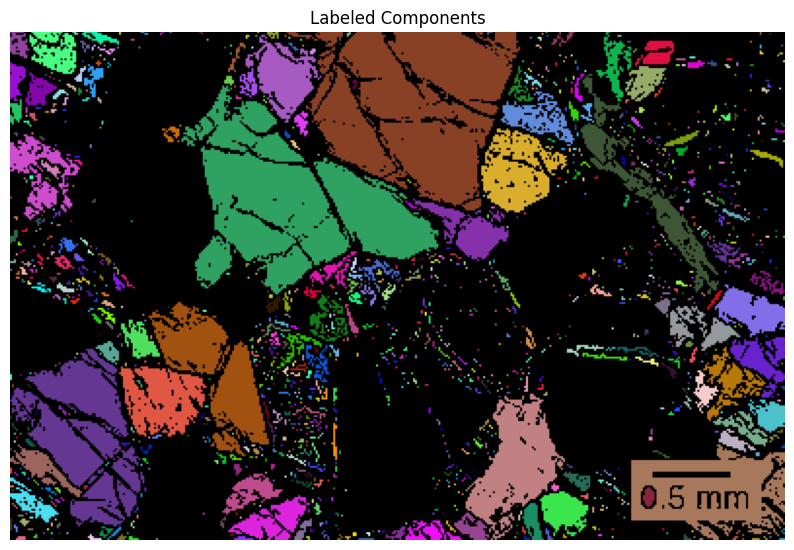


Component Statistics:
      Label  Area  Integrated Density  \
0         1    87               12196   
1         2   336               47458   
2         3     4                 581   
3         4    57                9275   
4         5     2                 320   
...     ...   ...                 ...   
1193   1194     8                1422   
1194   1195     2                 265   
1195   1196     1                 134   
1196   1197     4                 547   
1197   1198     3                 412   

                                      Centroid  
0       [4.057471264367816, 6.379310344827586]  
1     [22.672619047619047, 10.008928571428571]  
2                                  [33.0, 0.5]  
3       [45.78947368421053, 2.824561403508772]  
4                                  [56.0, 0.5]  
...                                        ...  
1193                            [182.5, 260.0]  
1194                            [354.5, 260.0]  
1195                            [376.0, 260

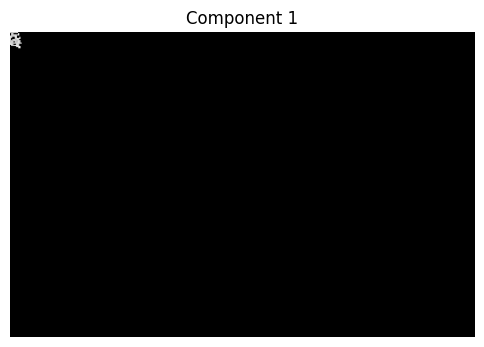

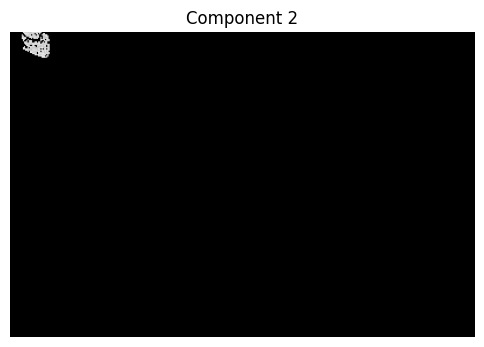

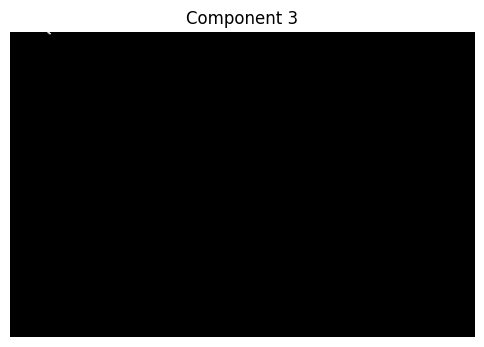

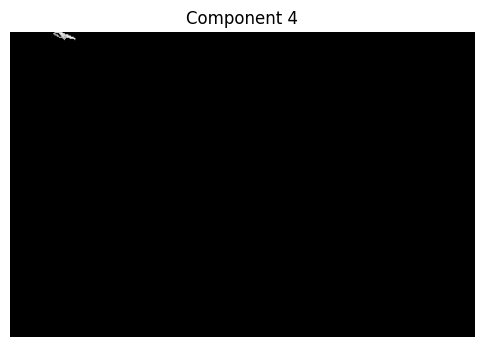

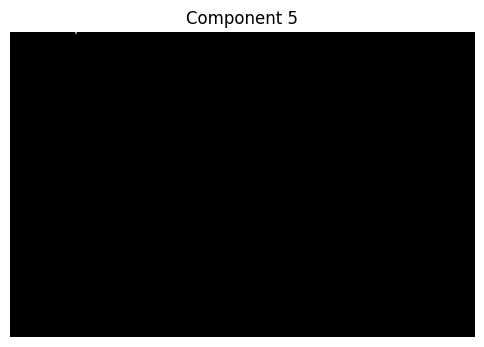

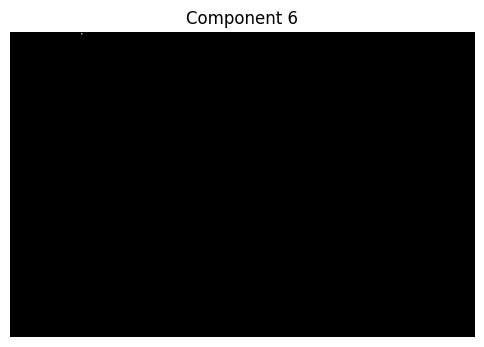

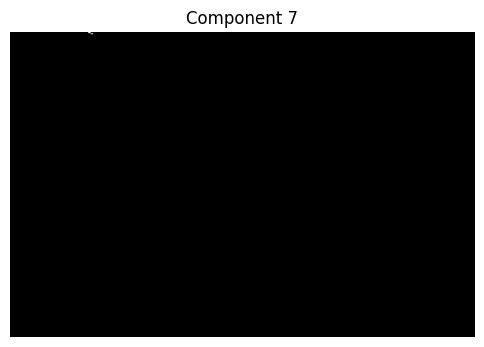

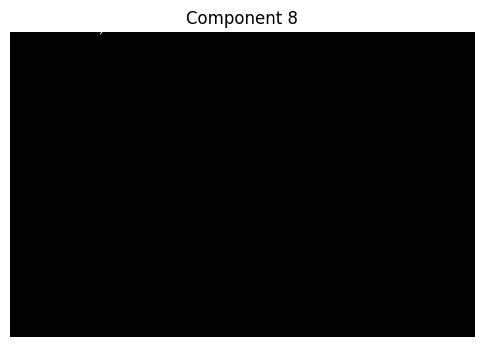

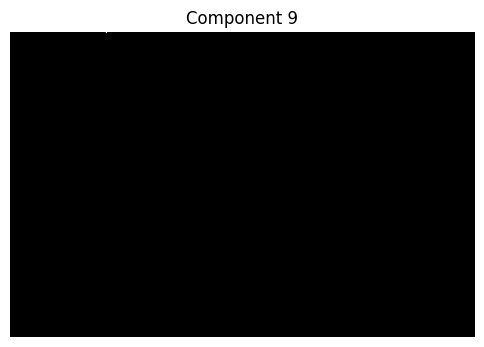

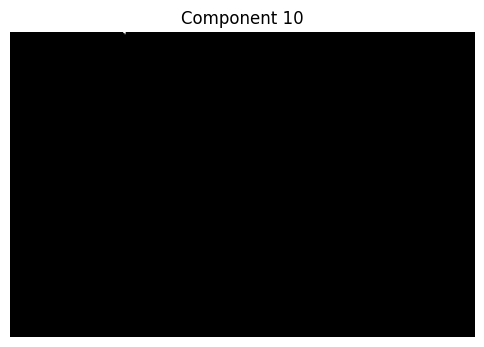

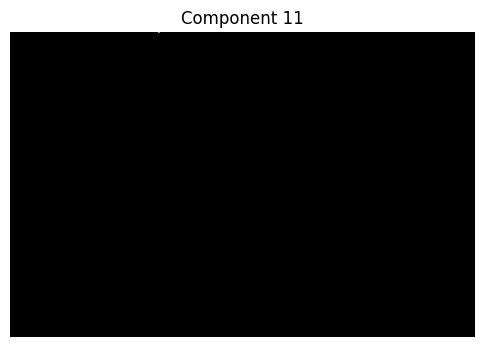

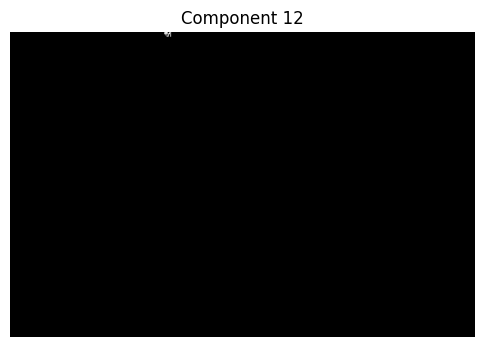

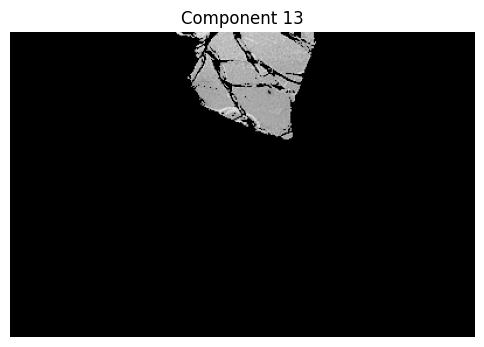

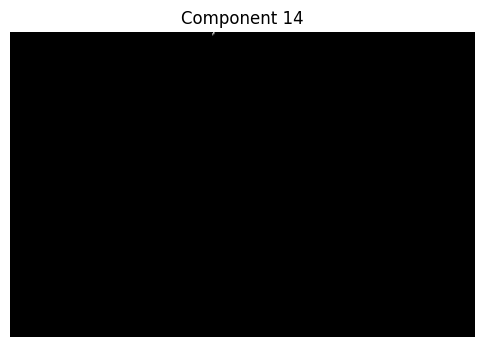

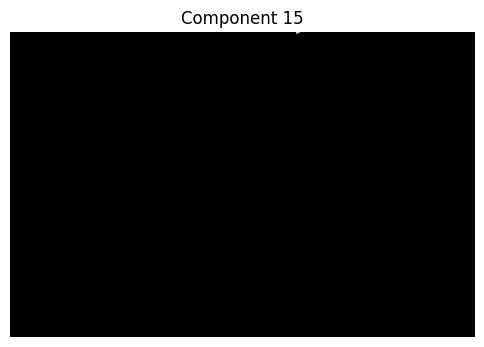

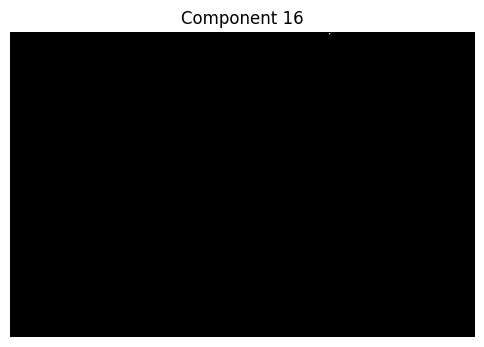

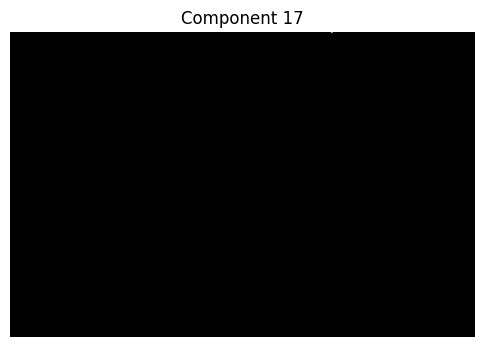

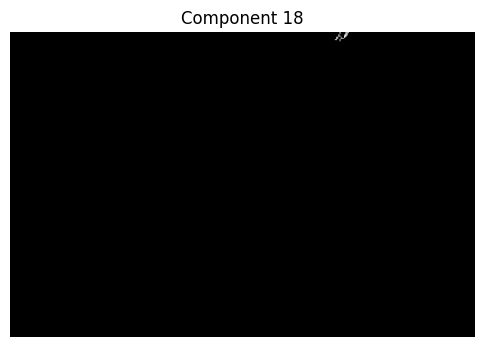

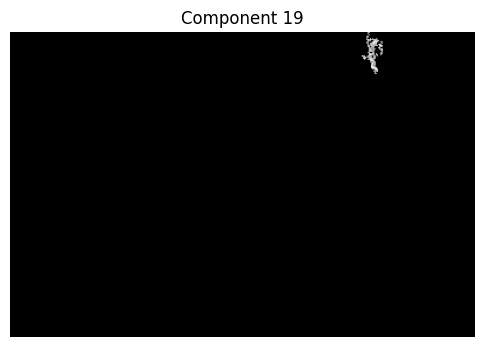

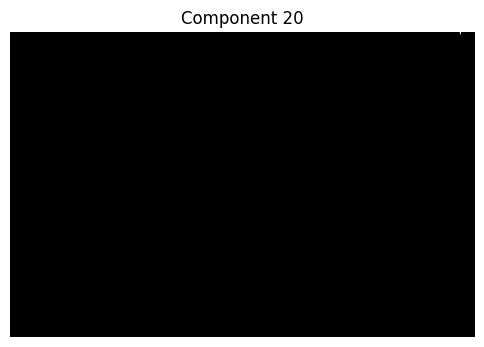

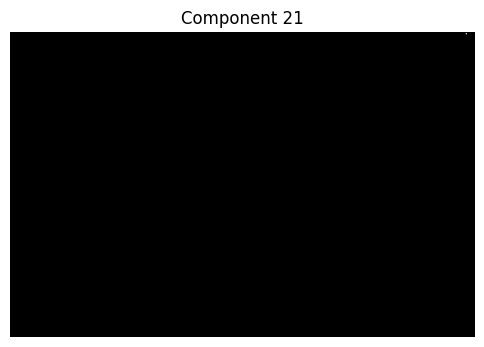

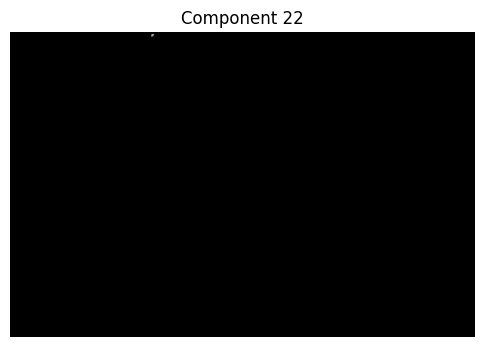

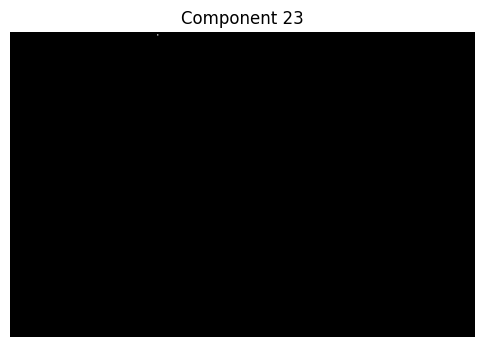

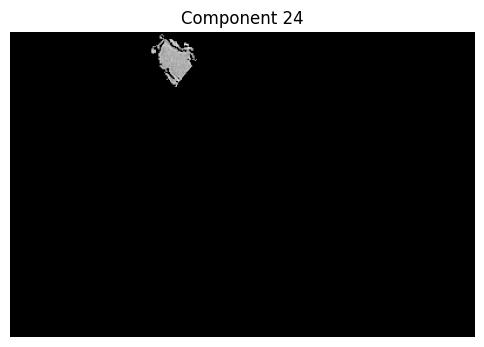

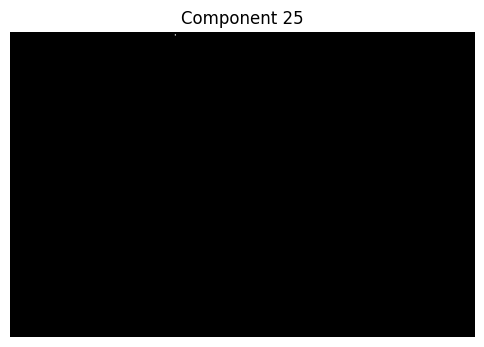

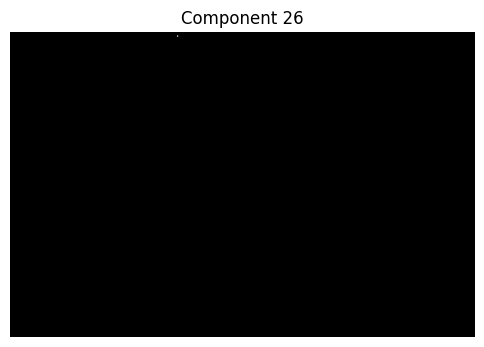

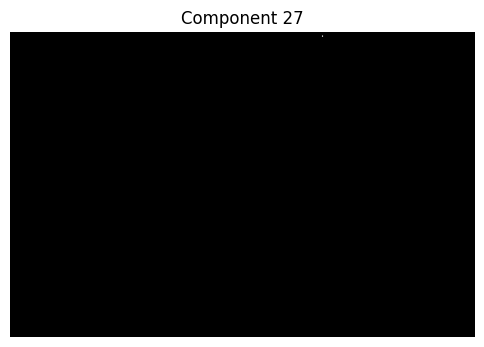

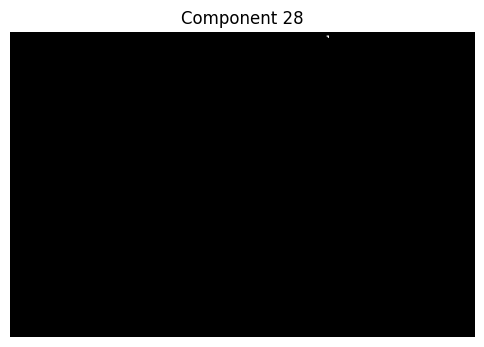

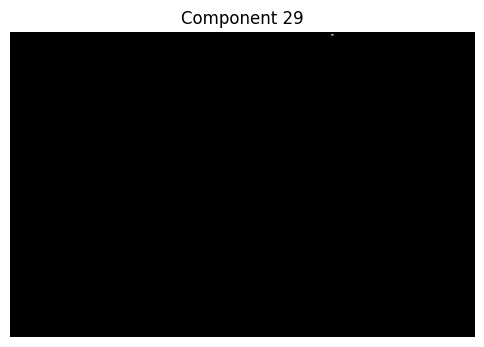

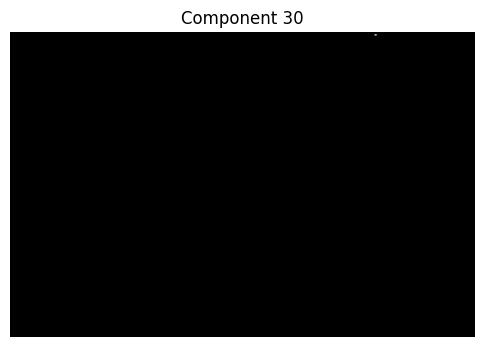

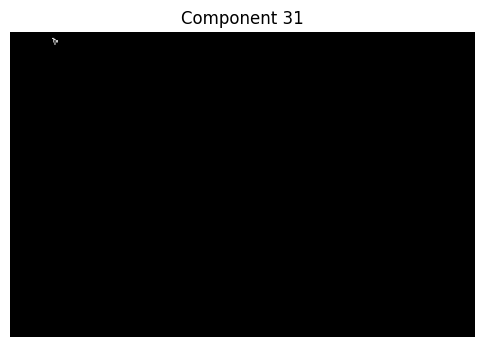

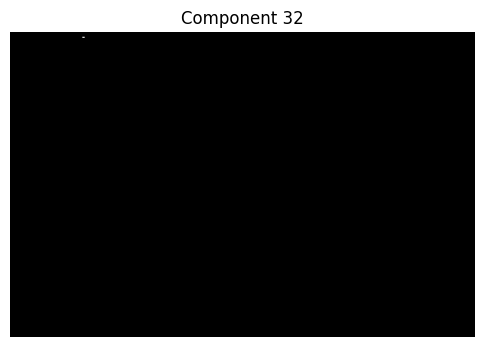

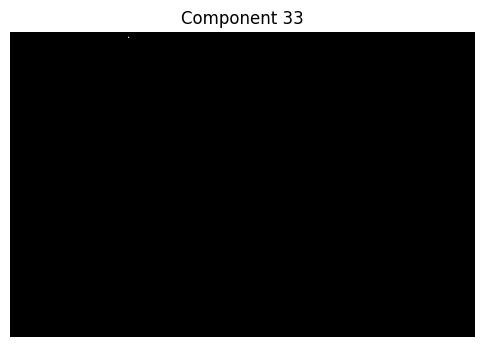

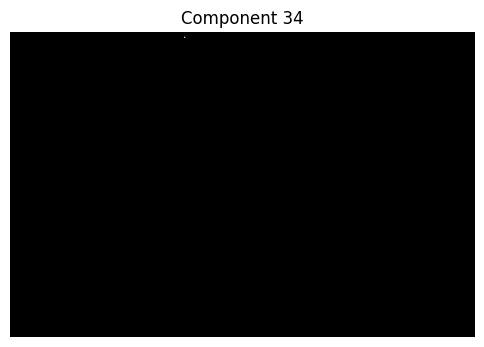

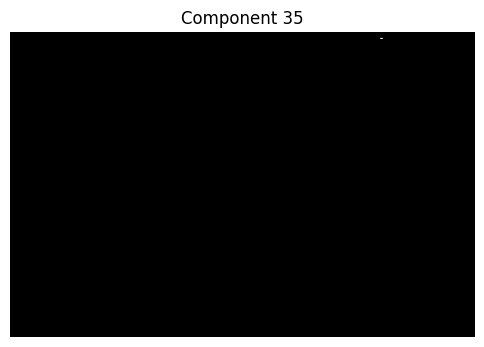

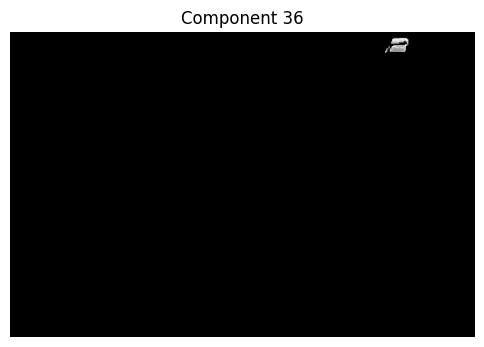

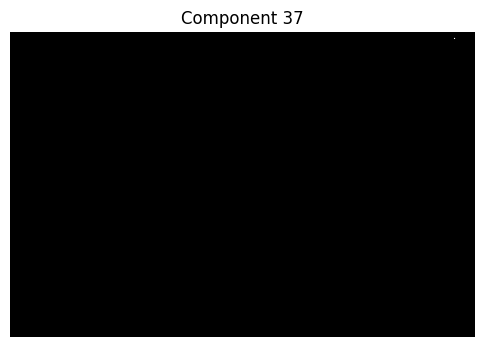

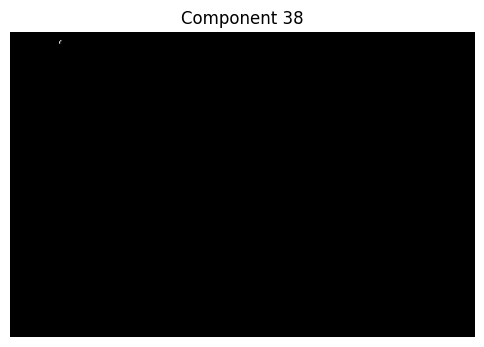

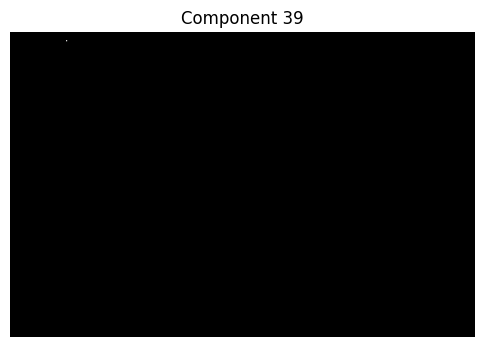

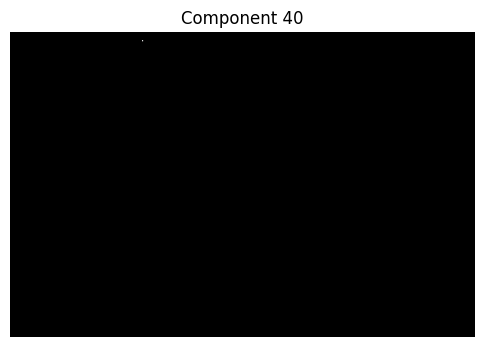

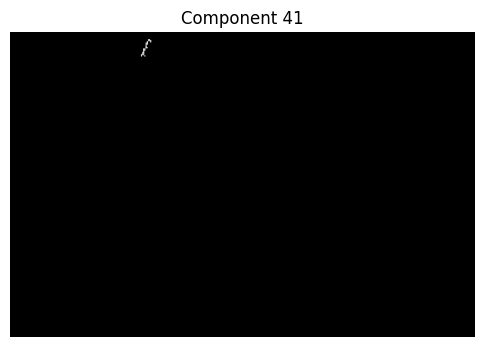

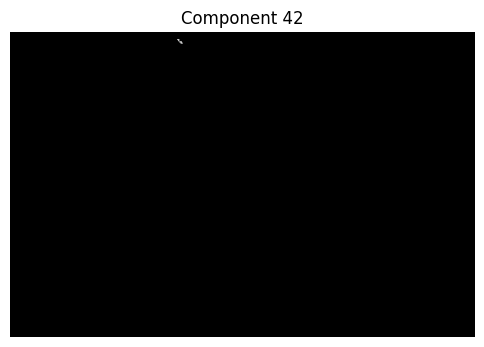

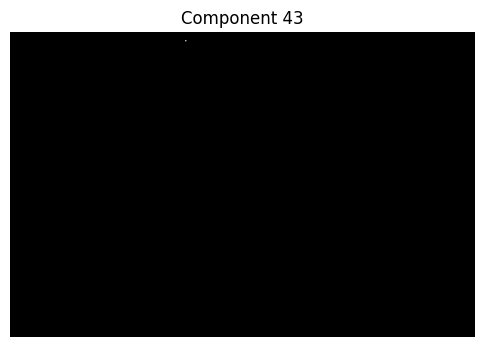

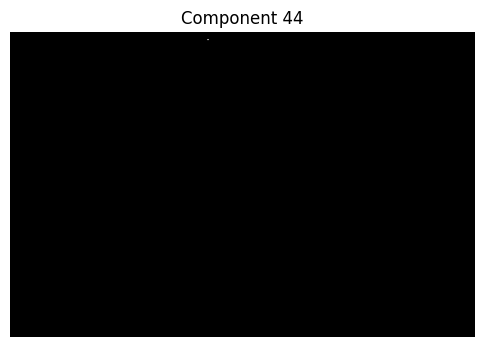

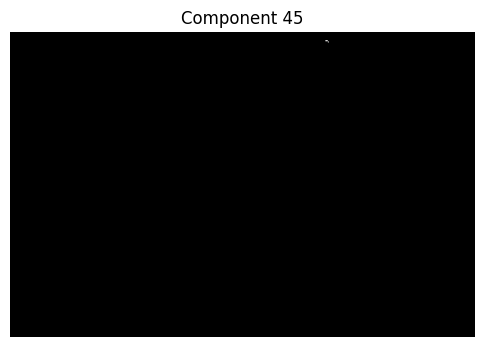

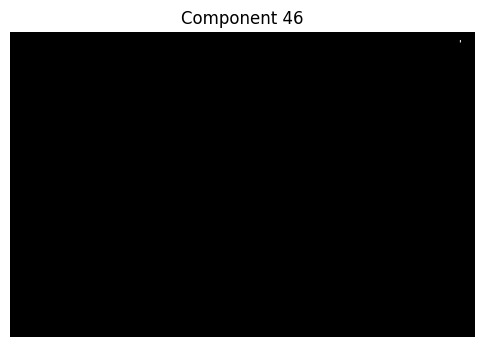

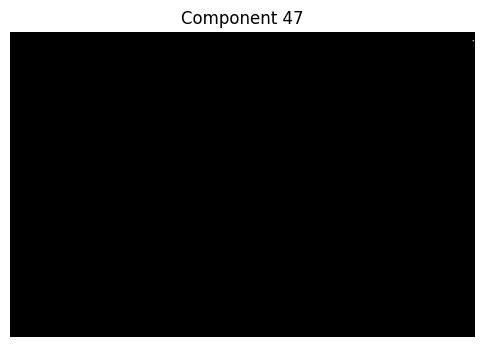

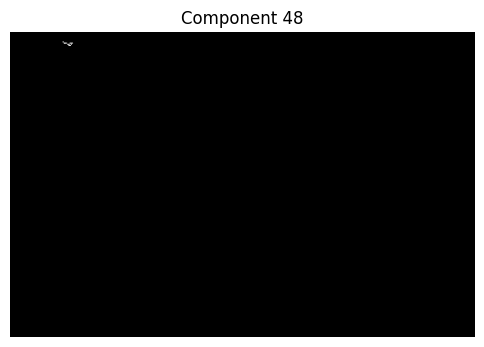

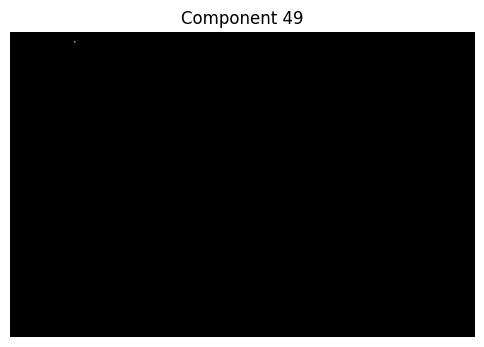

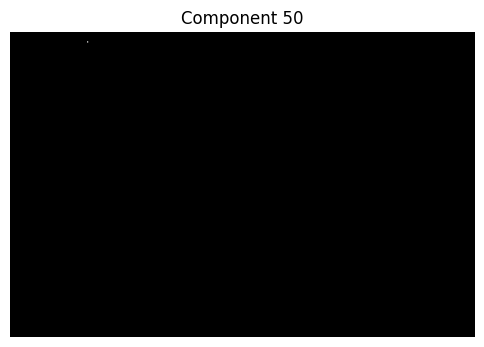

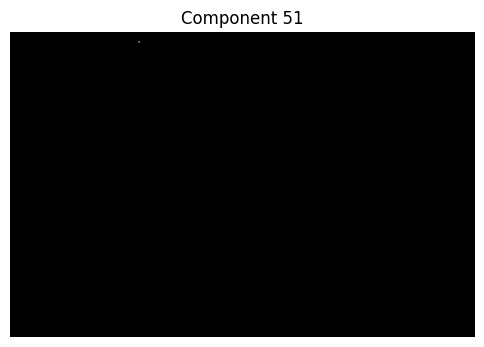

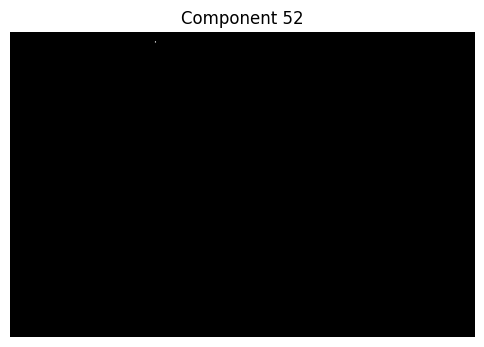

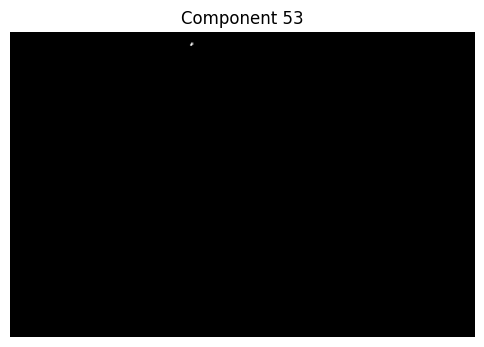

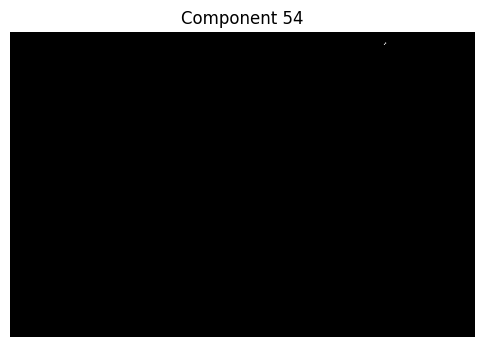

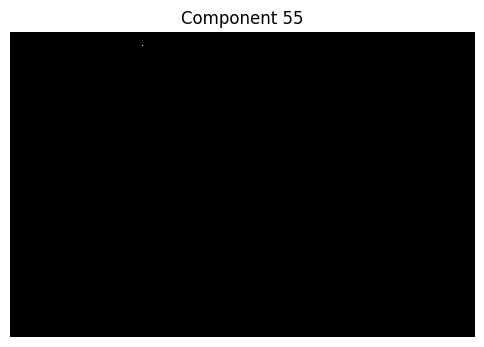

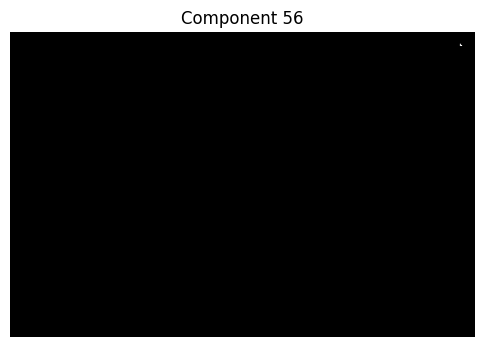

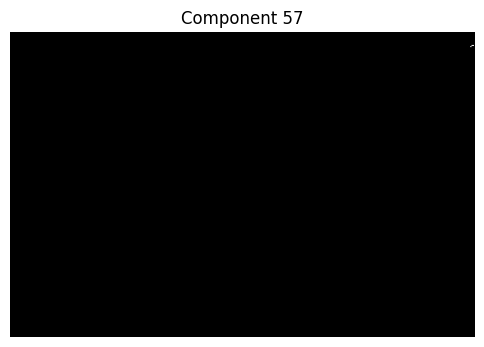

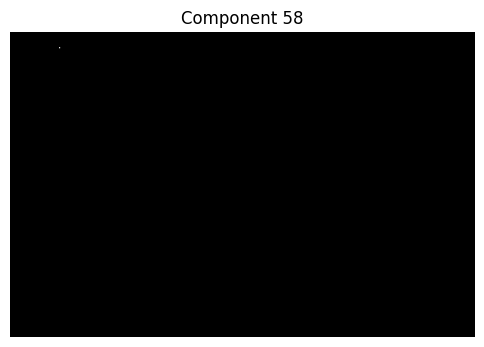

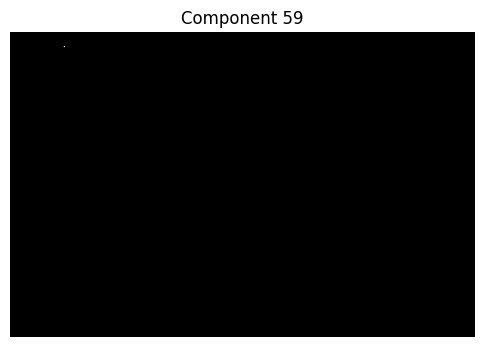

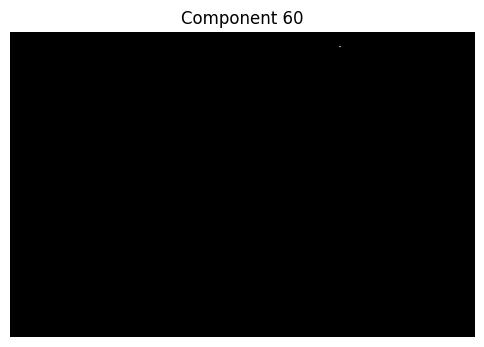

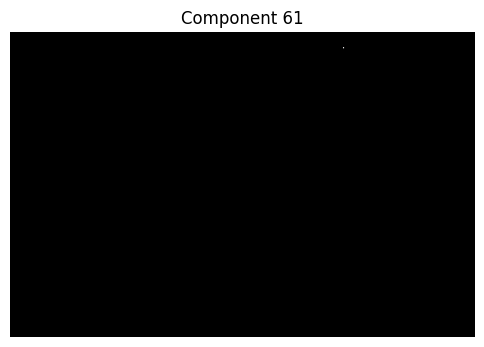

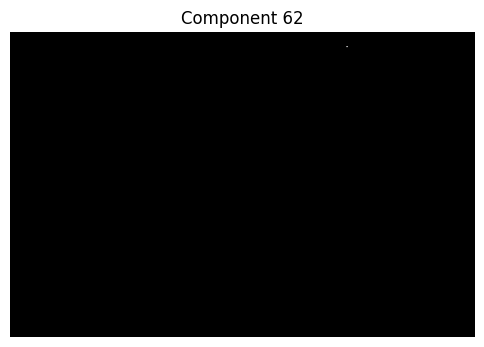

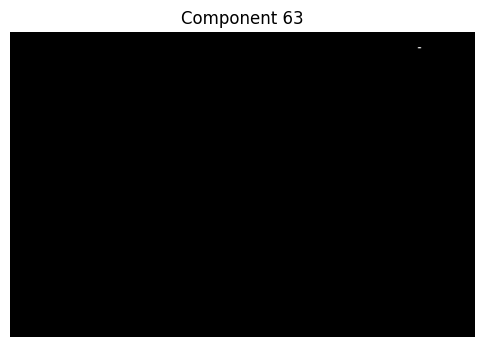

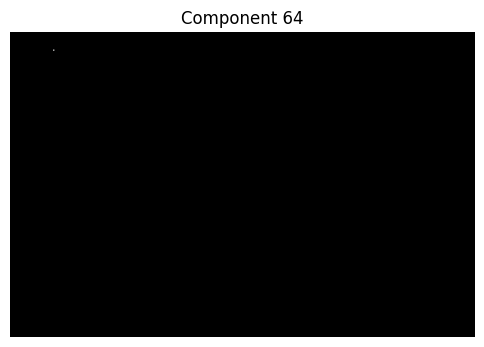

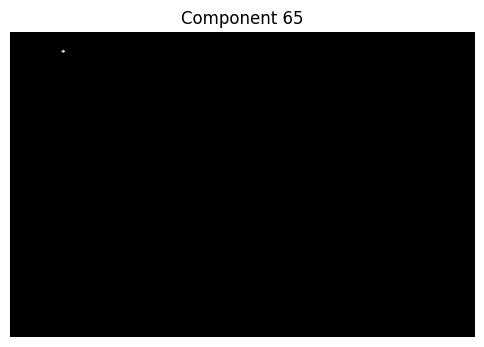

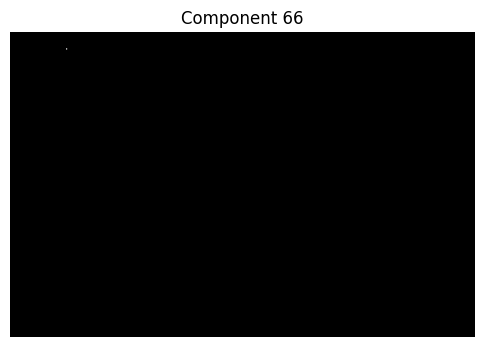

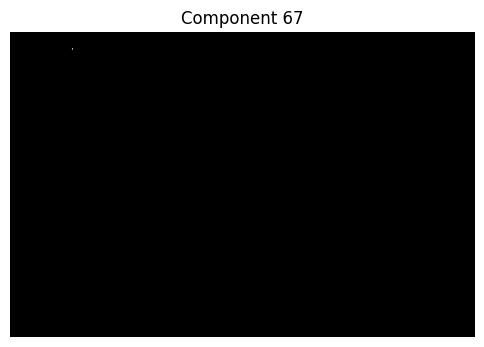

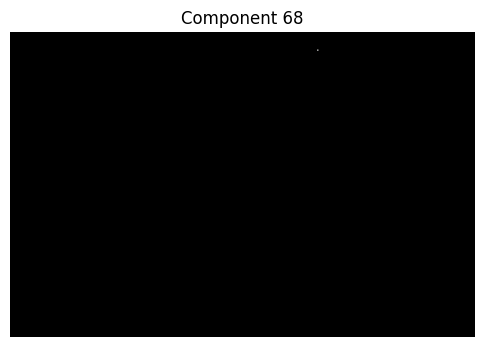

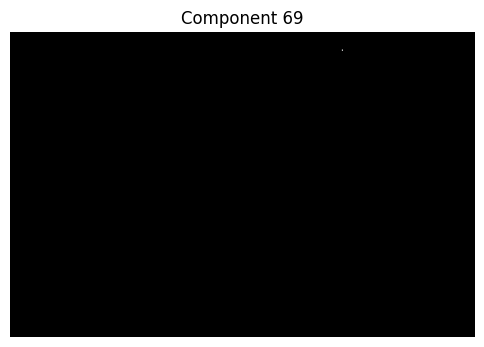

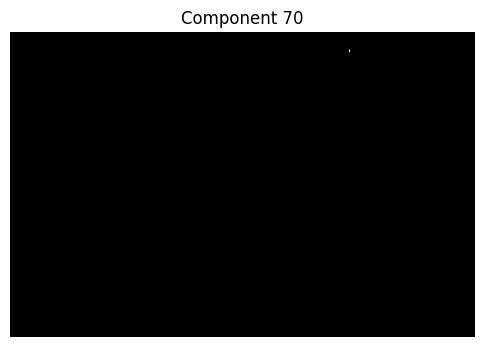

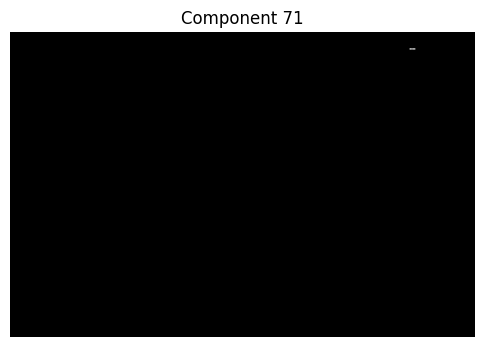

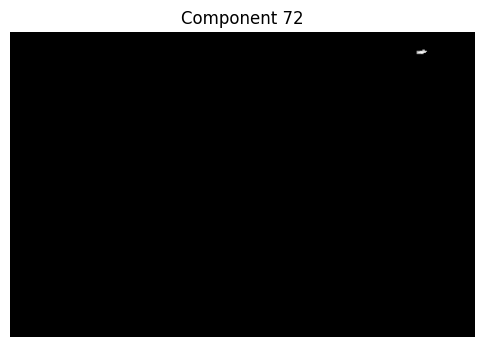

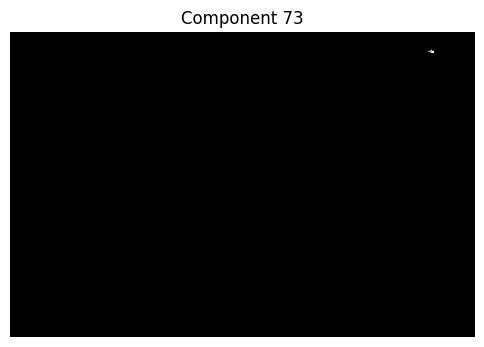

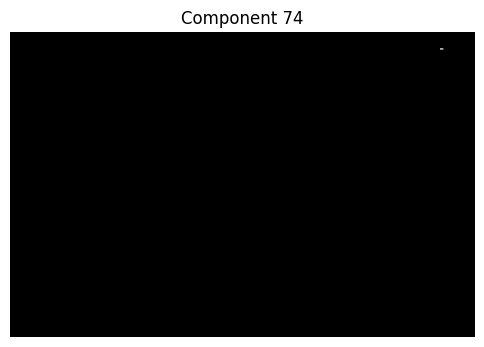

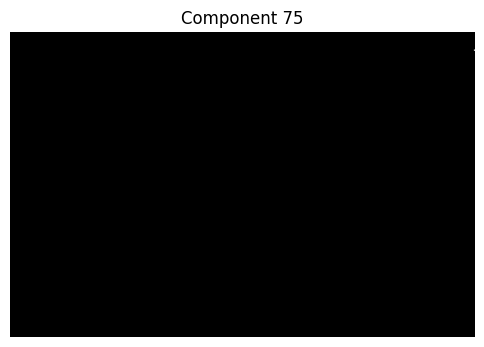

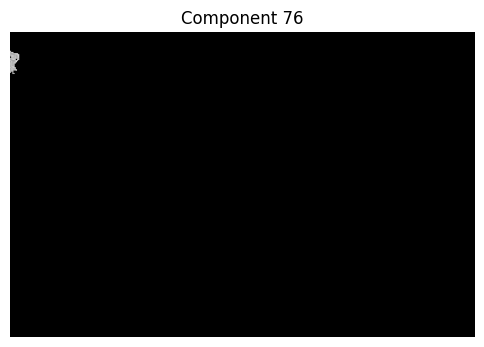

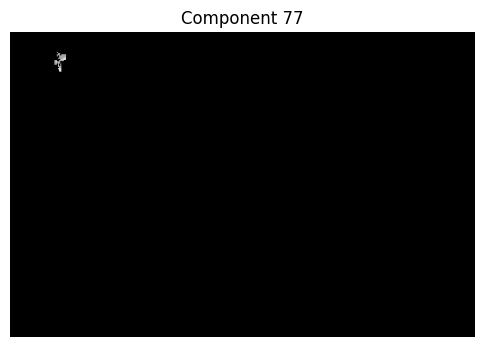

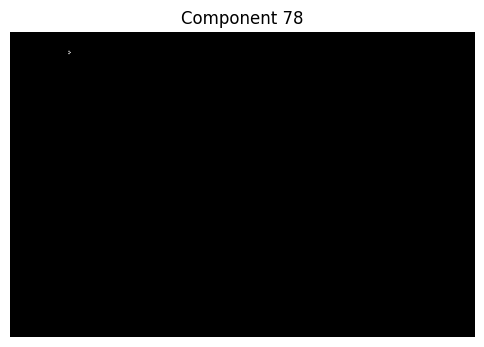

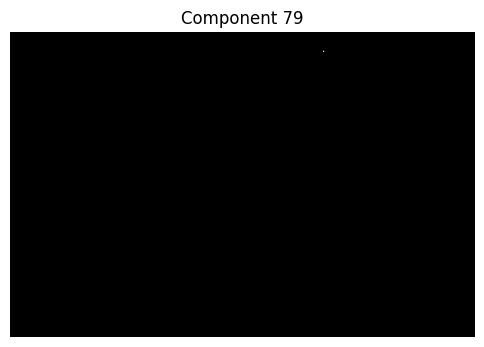

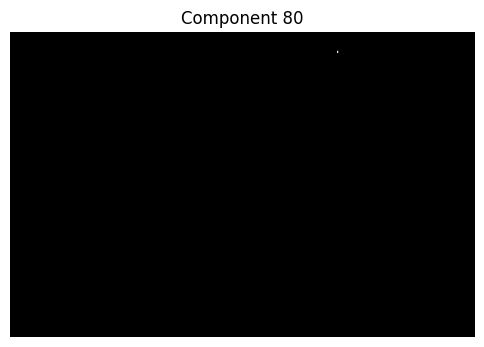

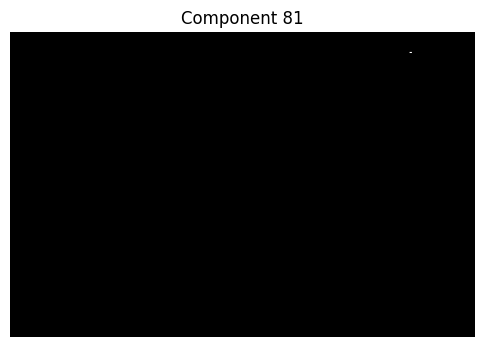

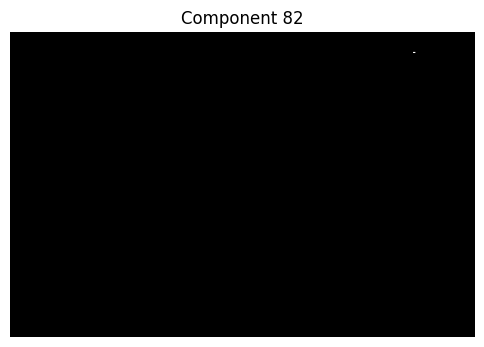

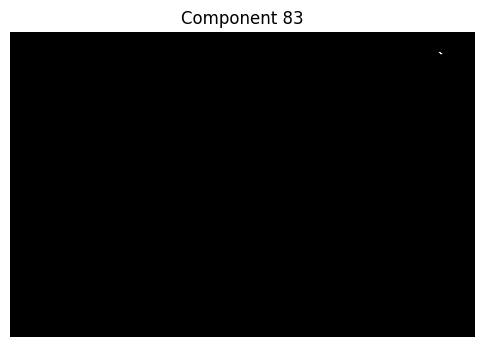

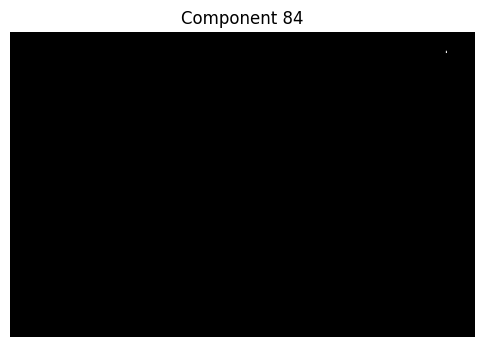

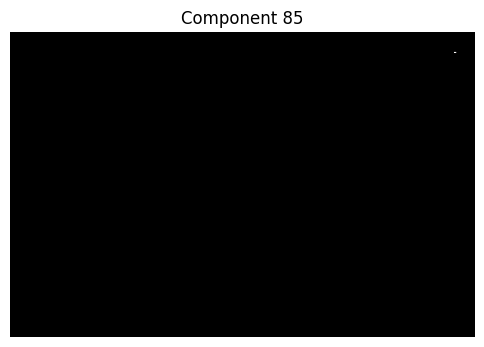

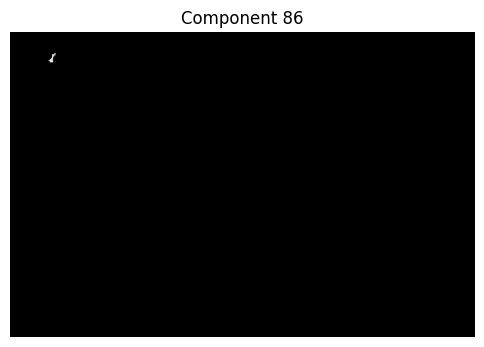

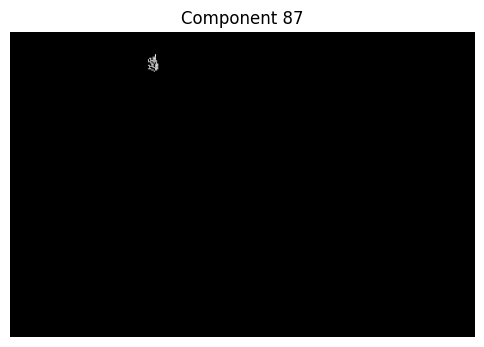

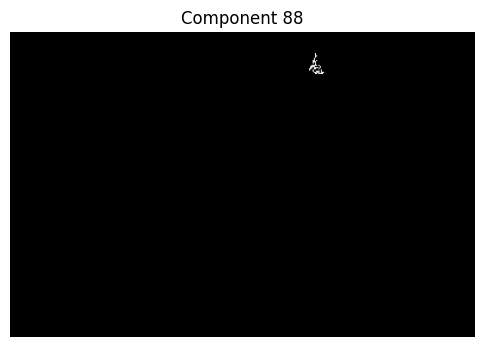

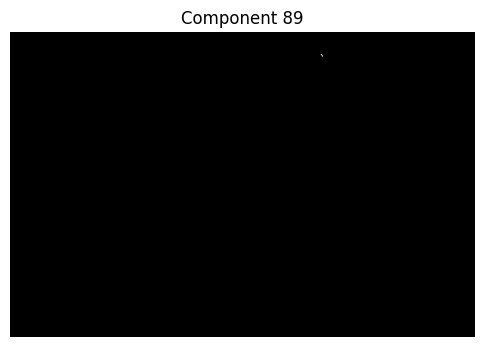

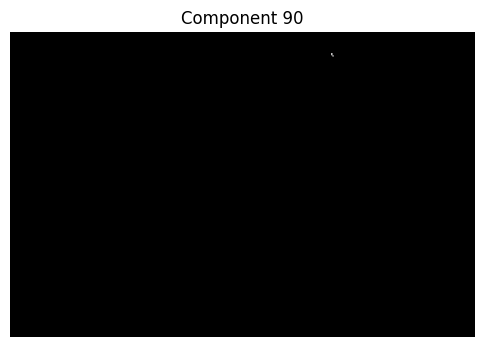

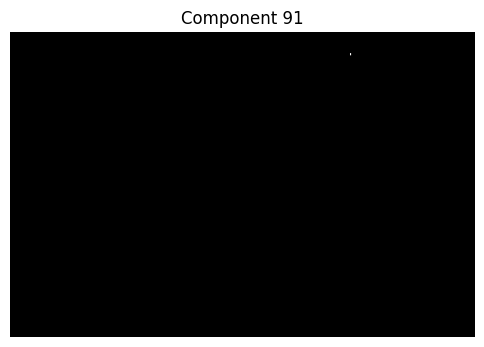

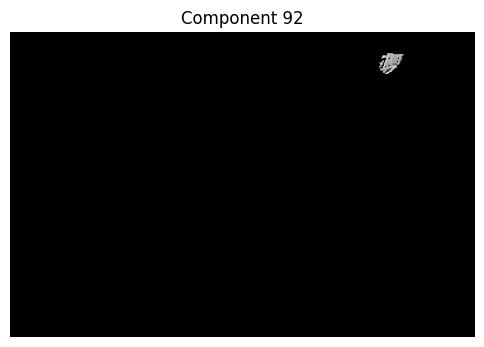

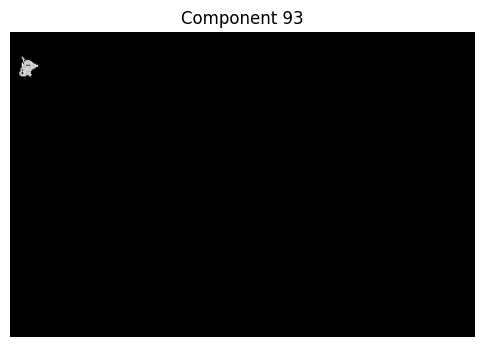

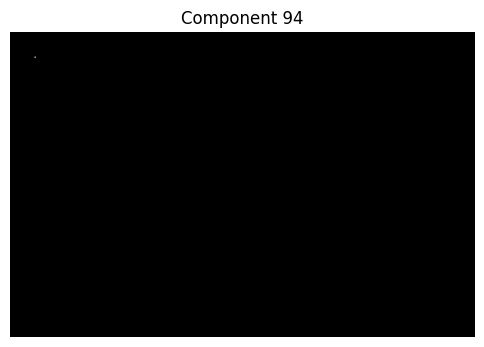

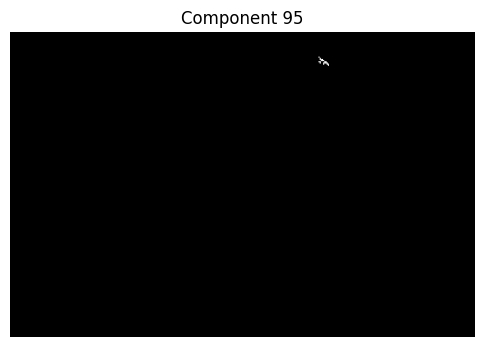

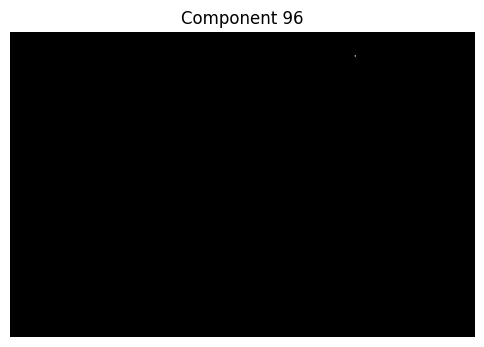

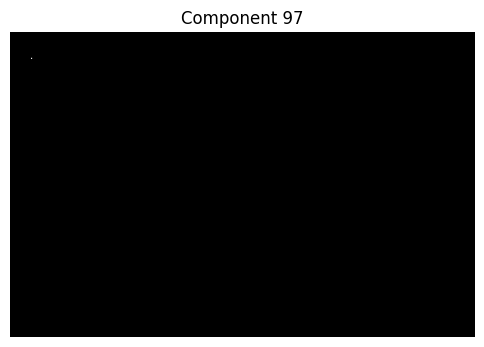

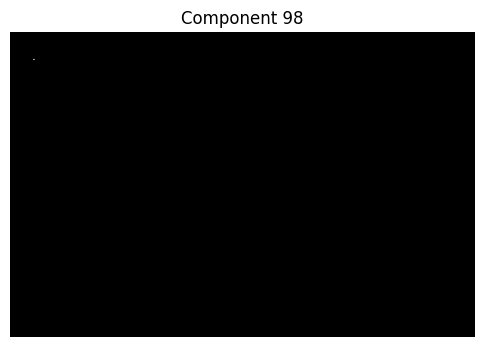

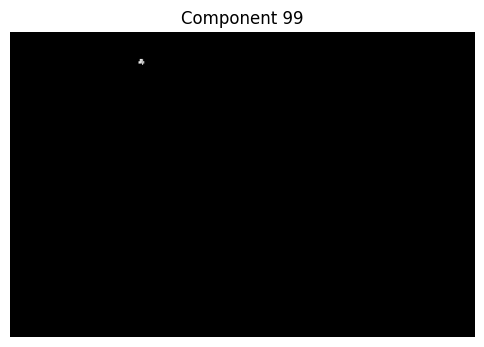

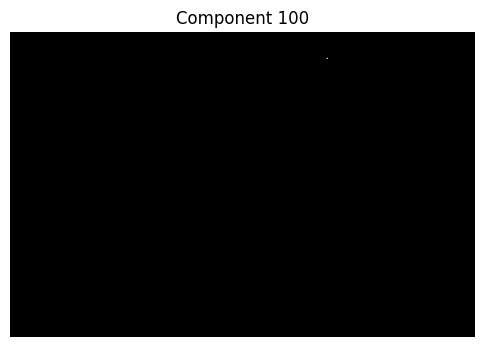

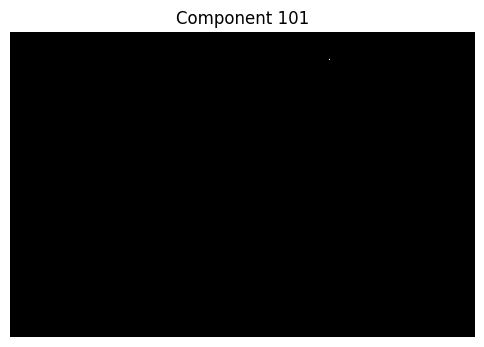

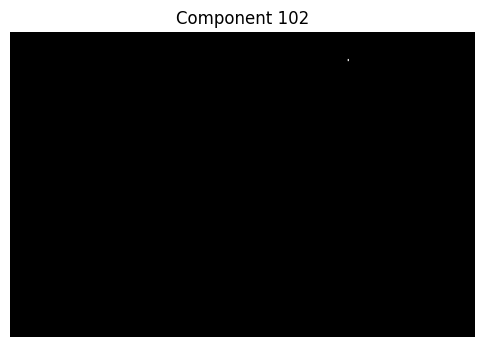

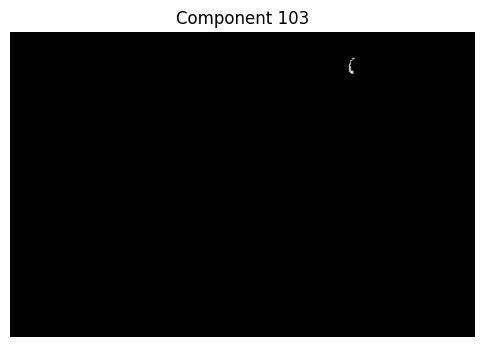

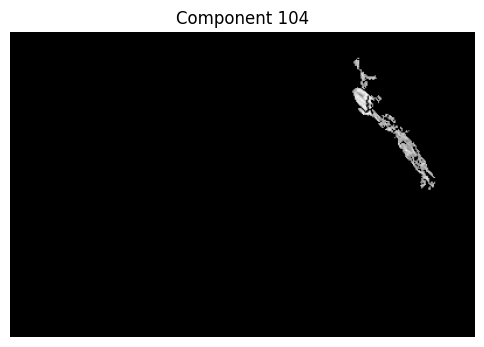

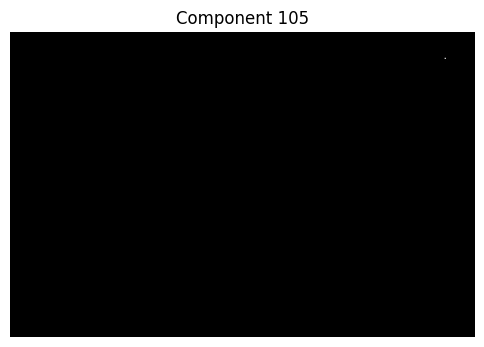

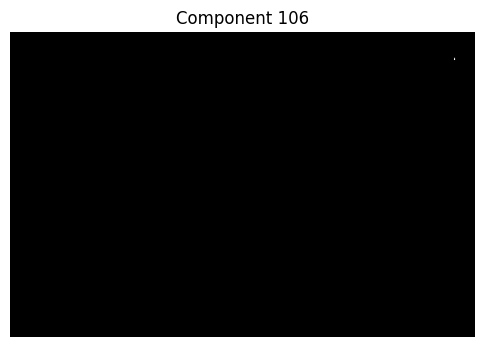

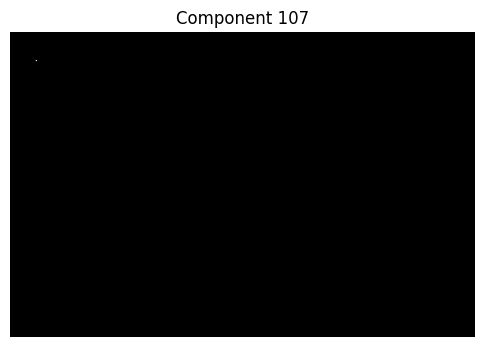

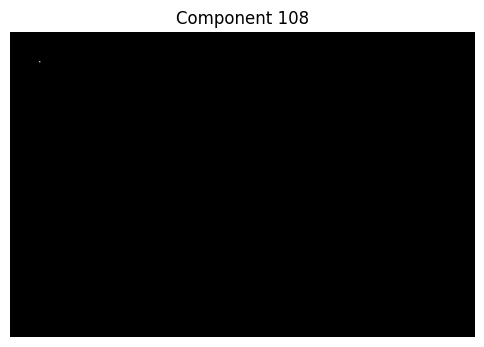

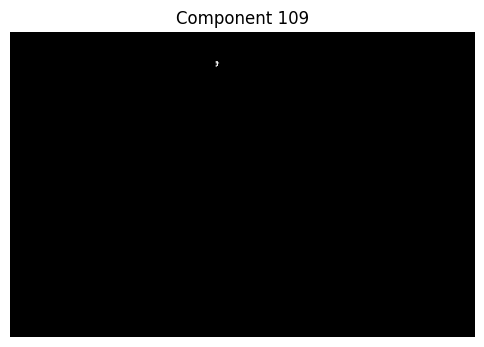

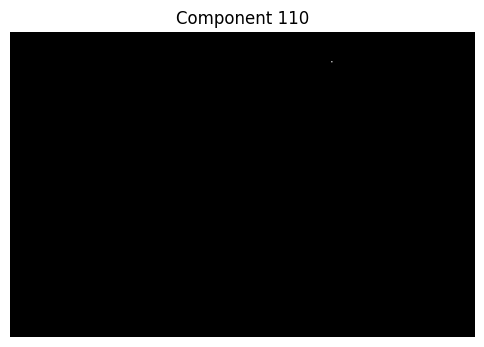

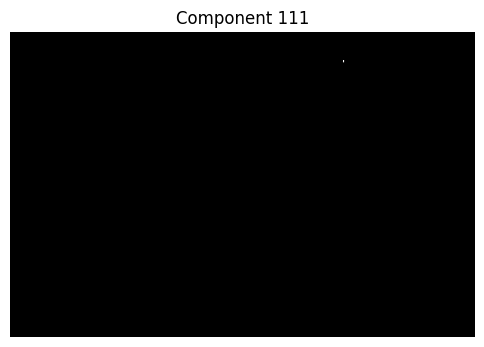

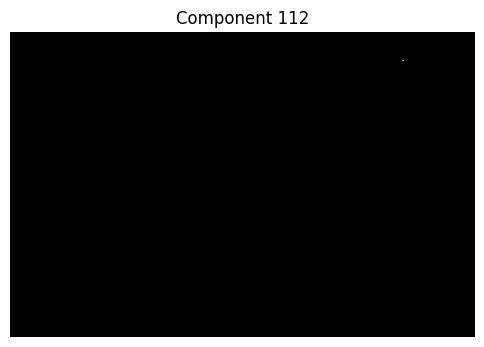

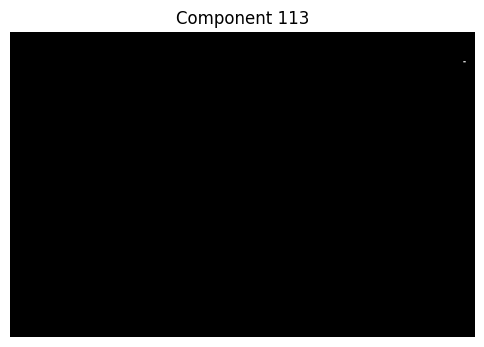

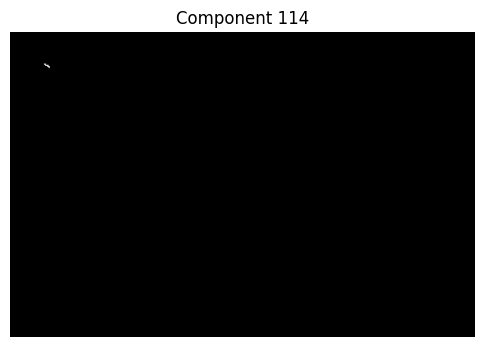

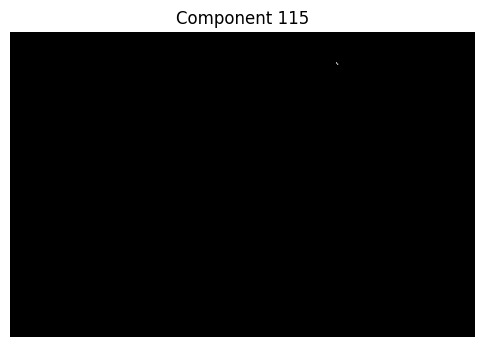

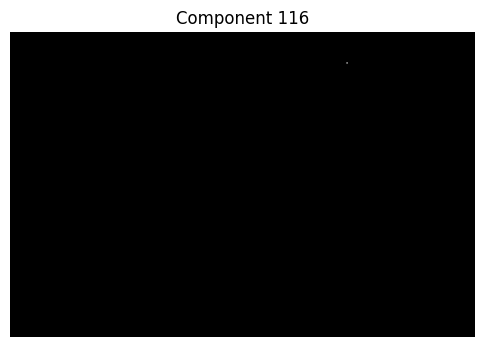

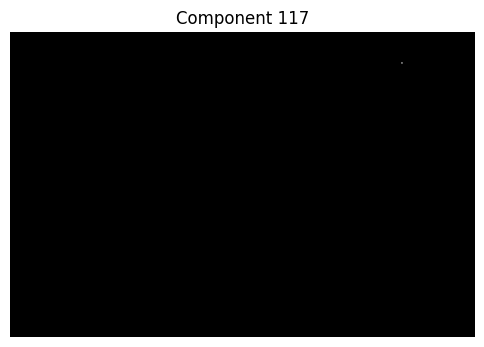

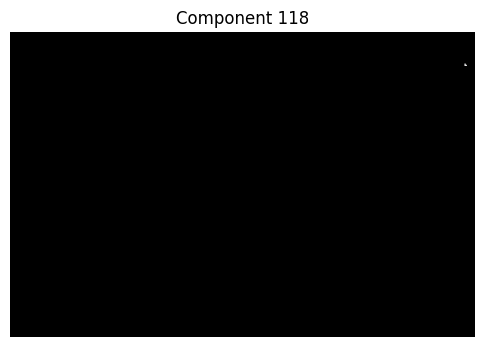

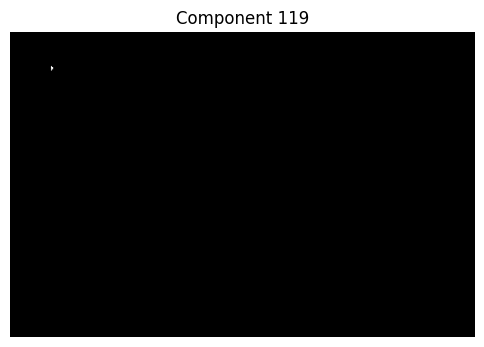

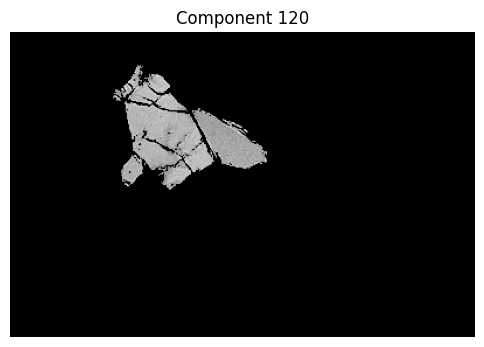

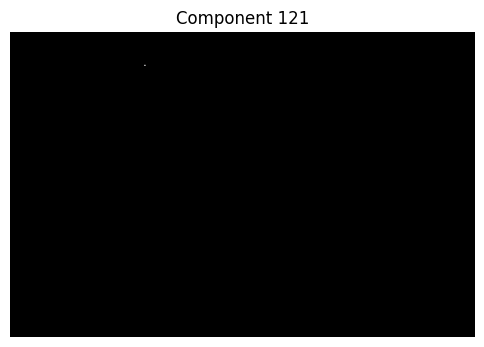

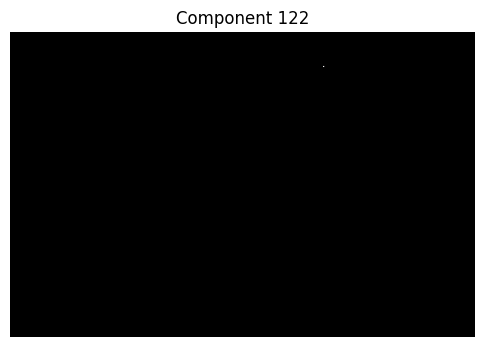

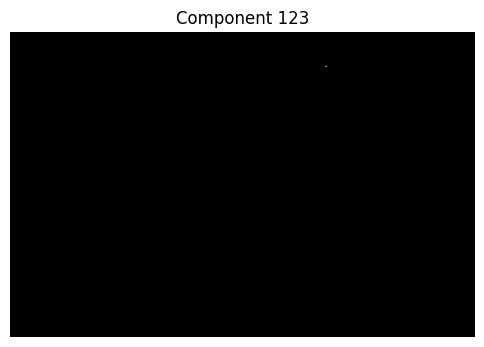

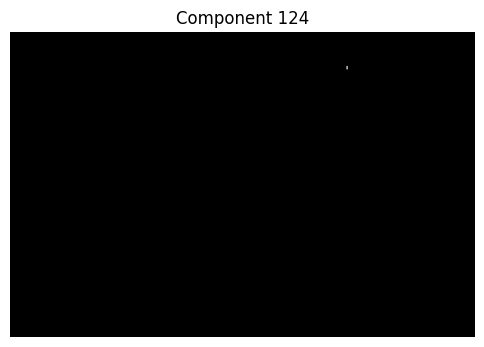

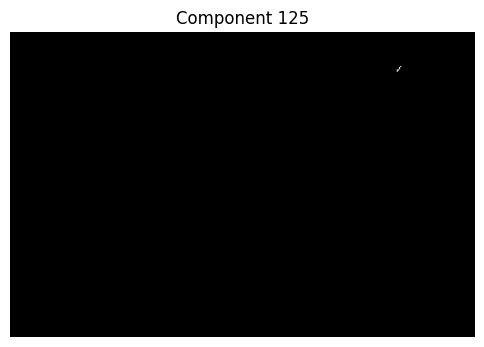

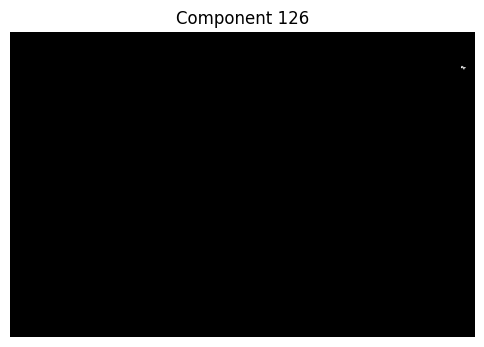

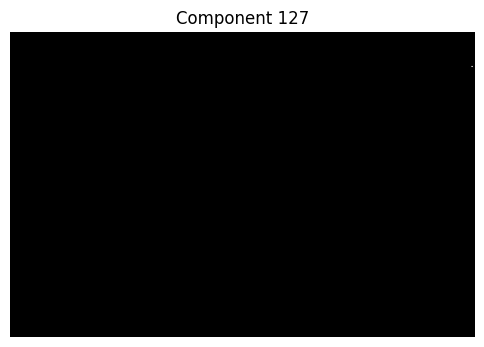

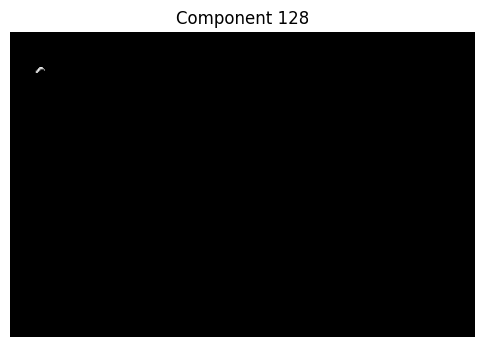

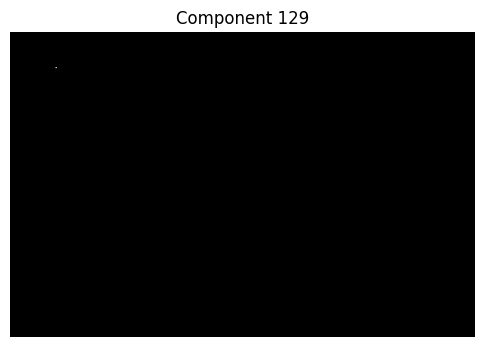

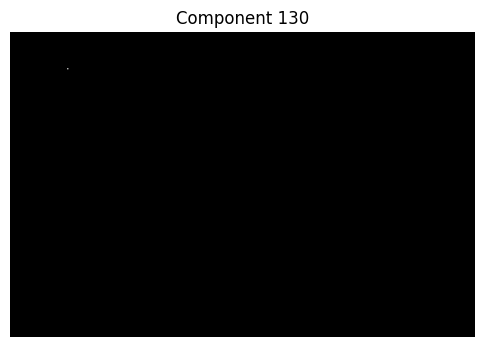

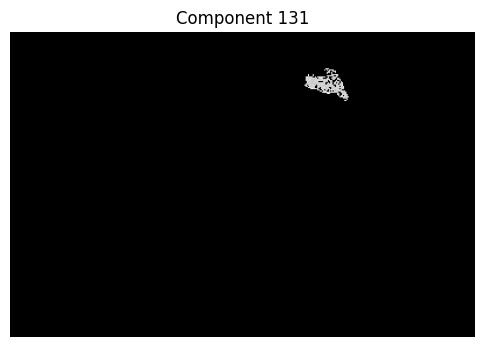

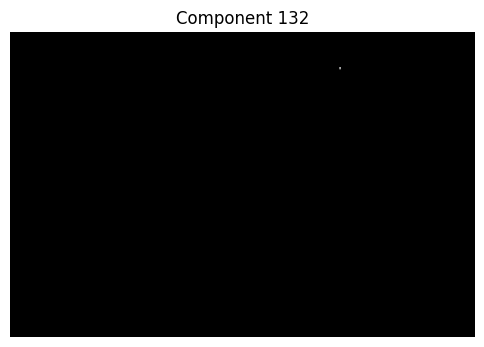

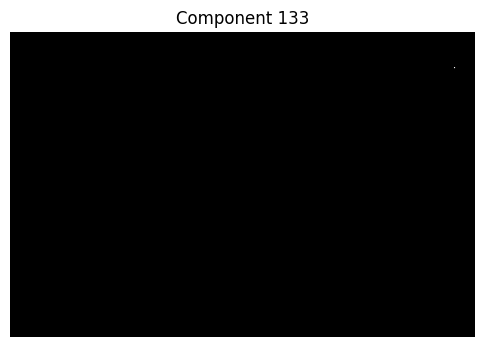

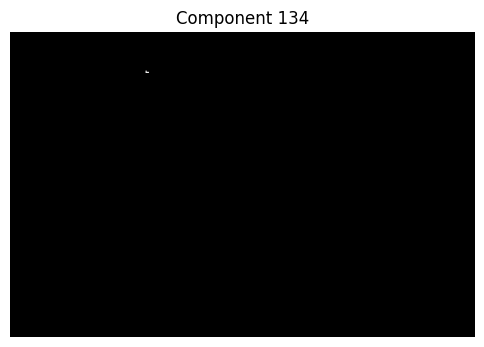

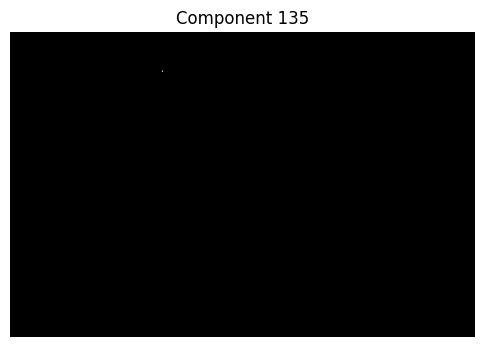

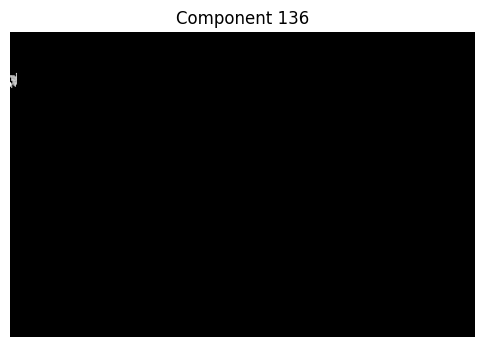

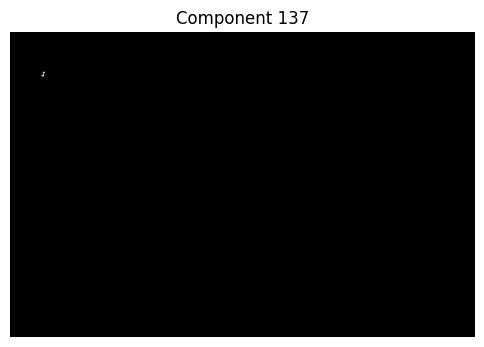

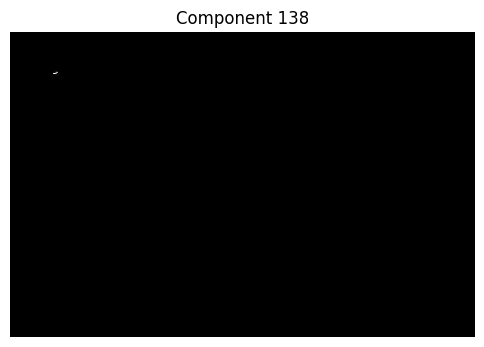

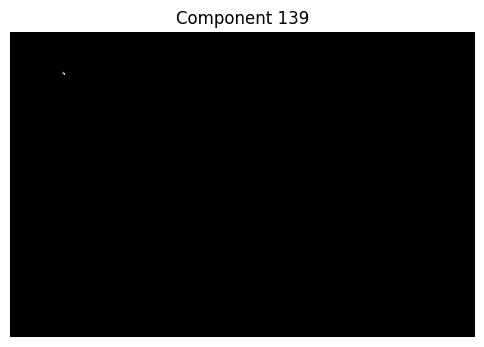

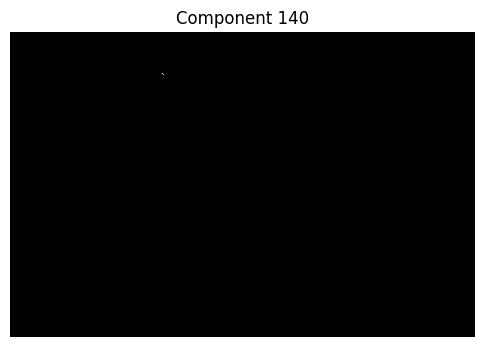

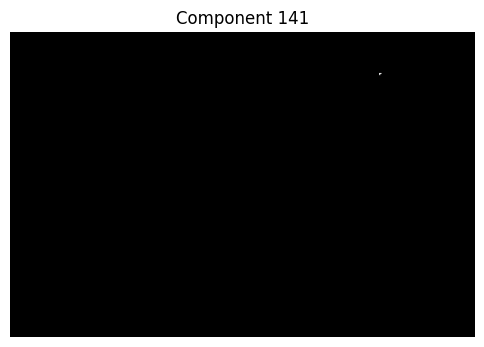

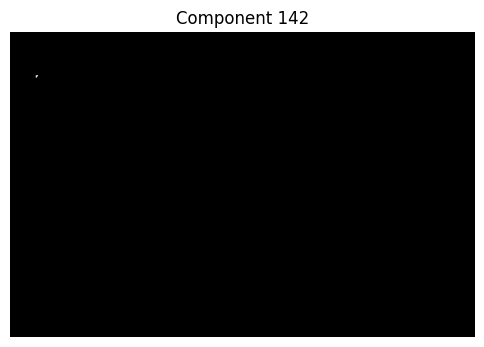

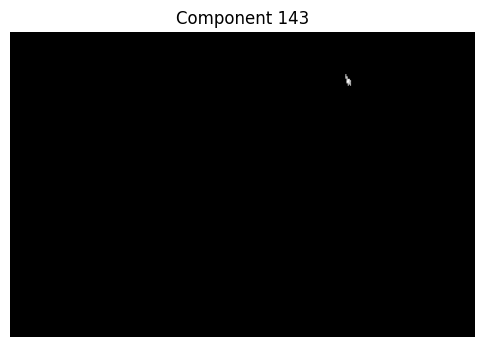

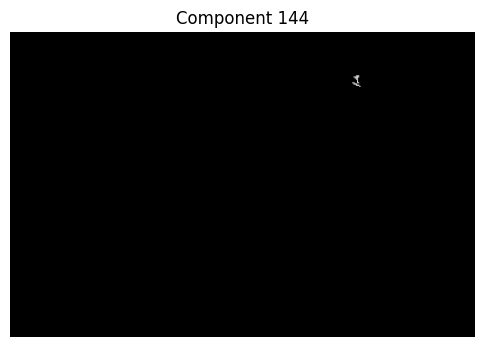

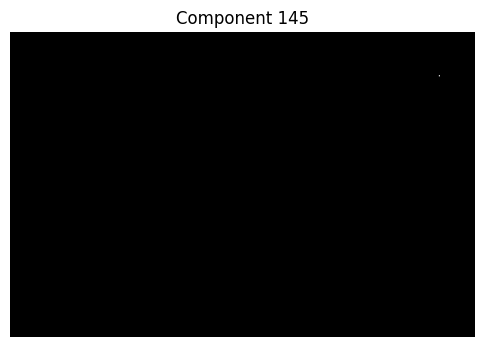

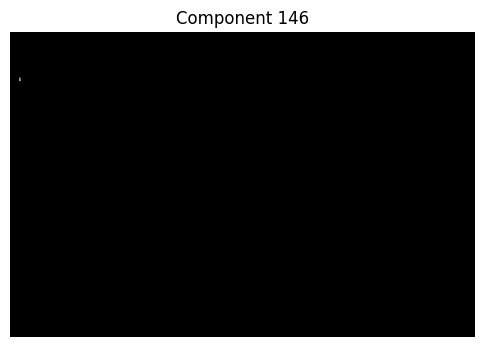

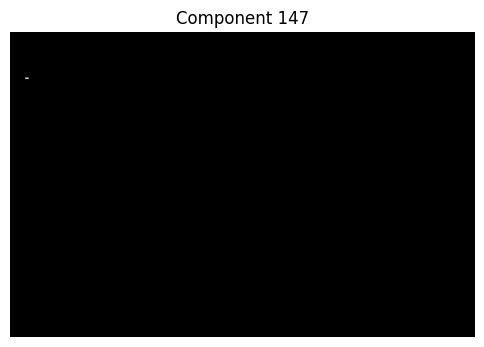

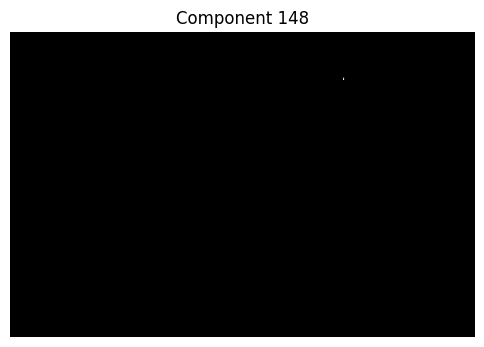

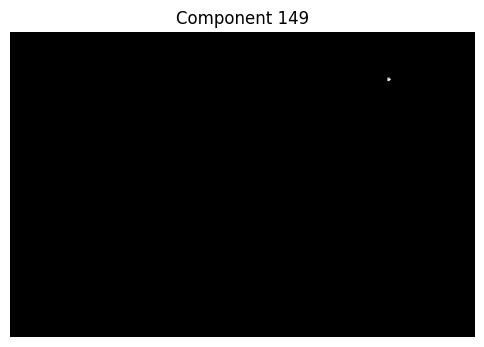

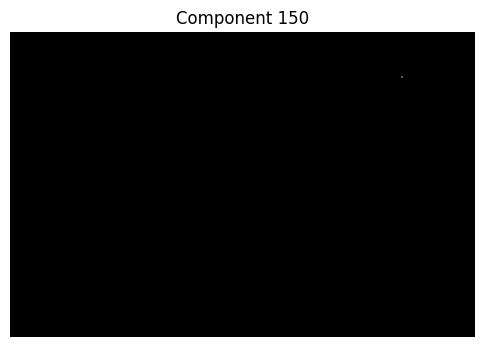

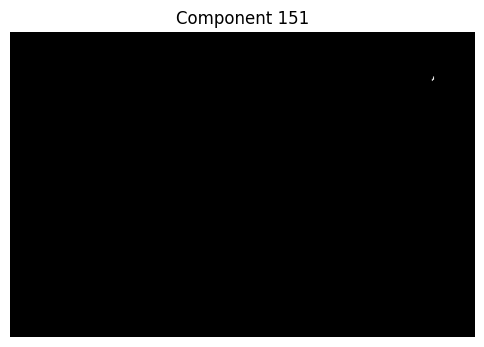

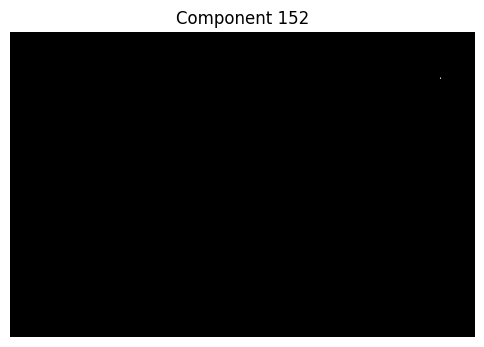

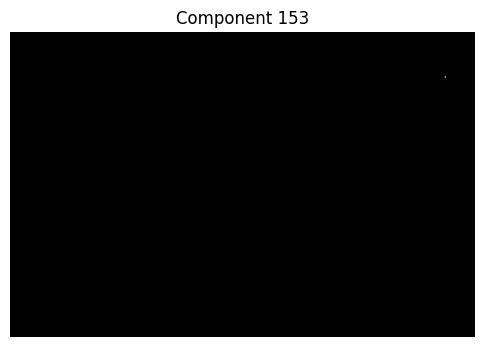

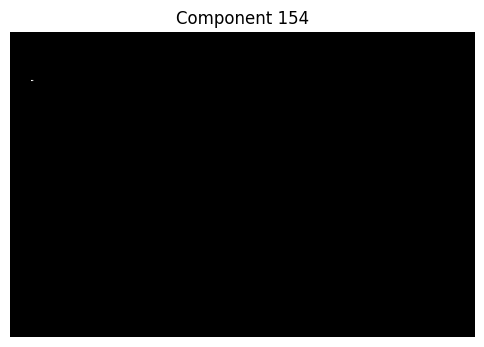

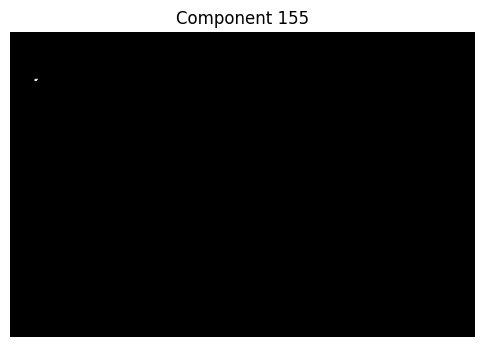

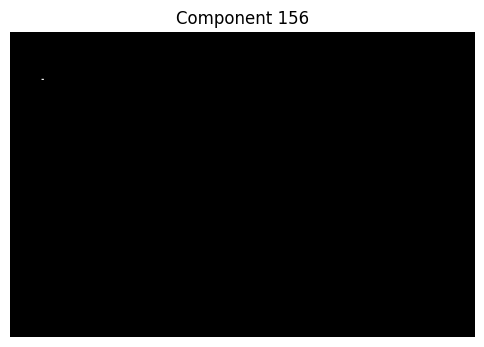

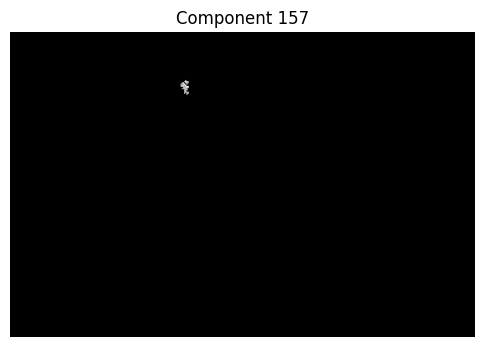

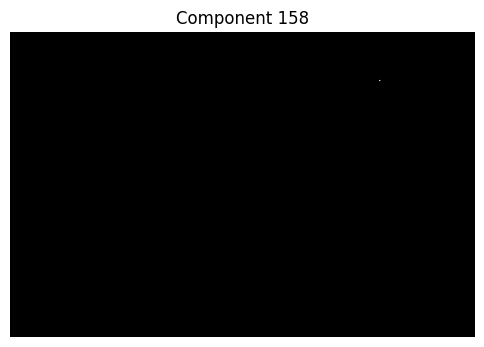

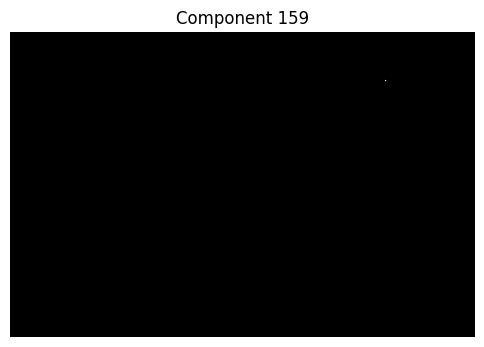

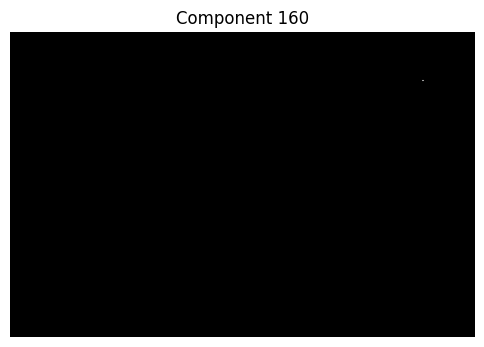

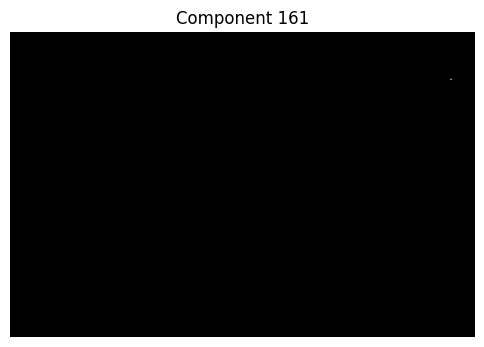

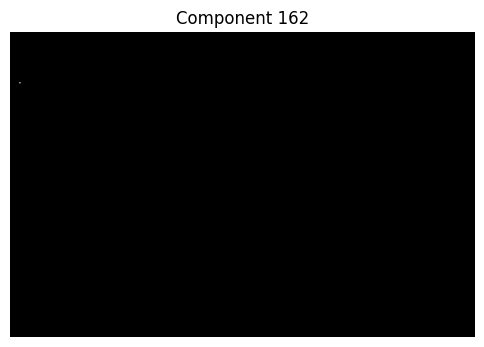

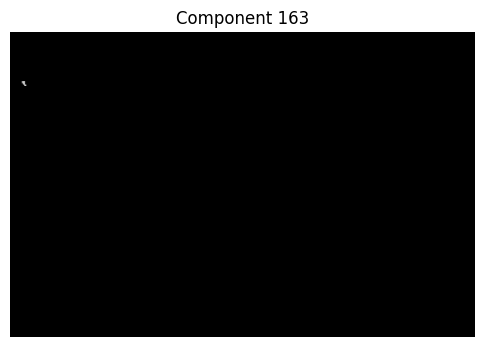

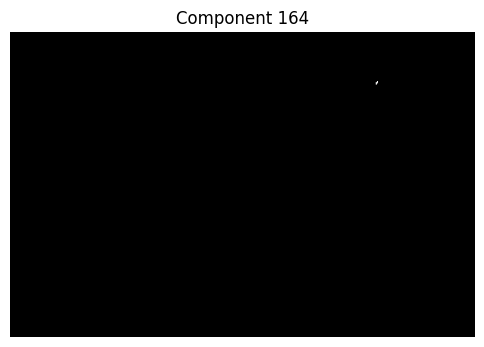

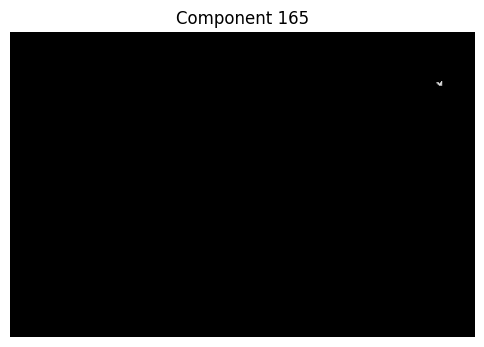

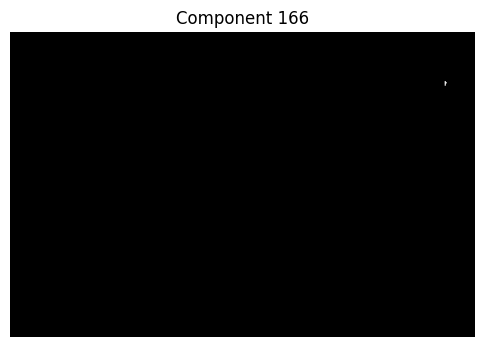

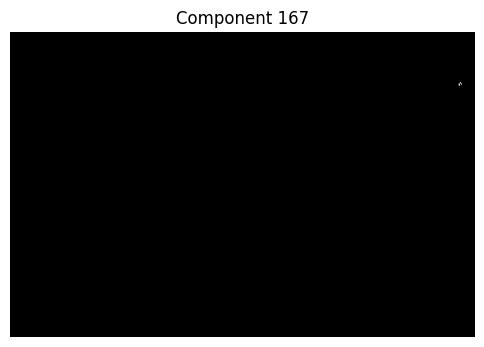

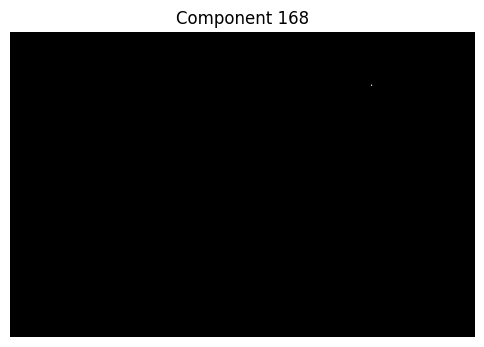

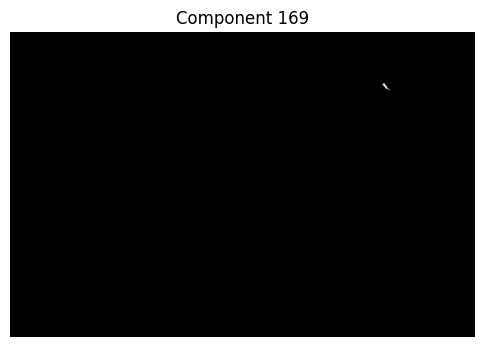

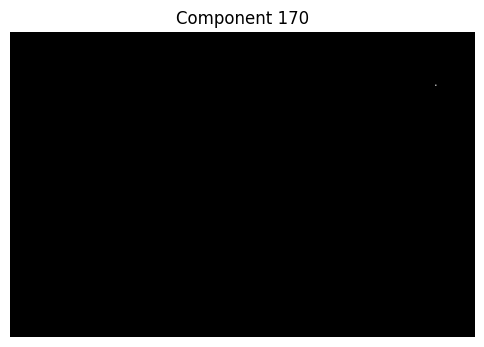

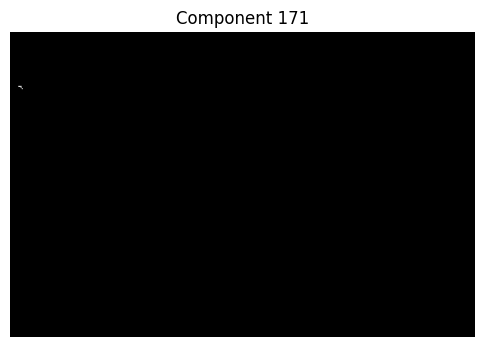

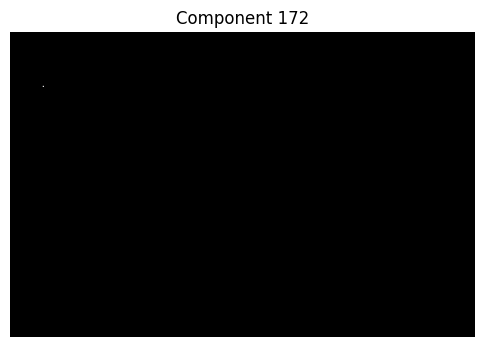

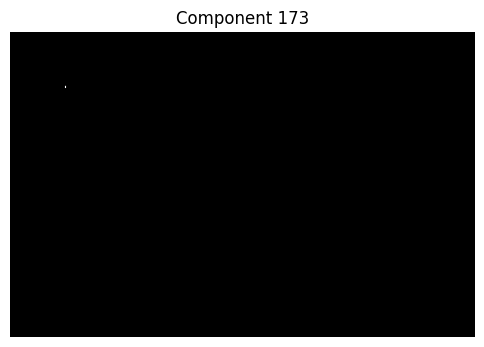

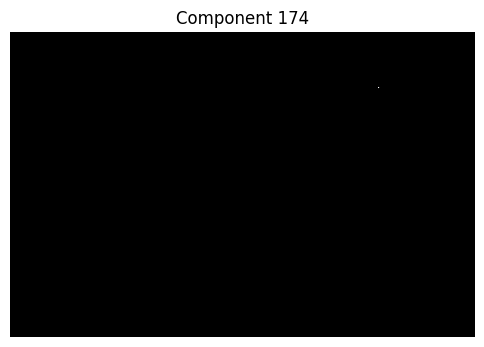

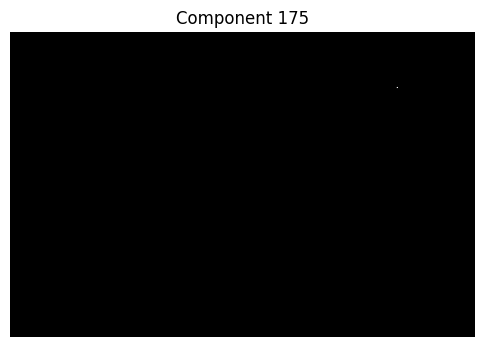

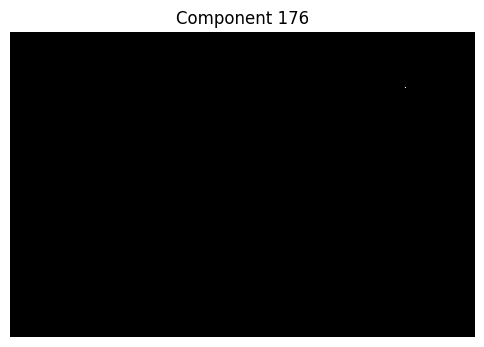

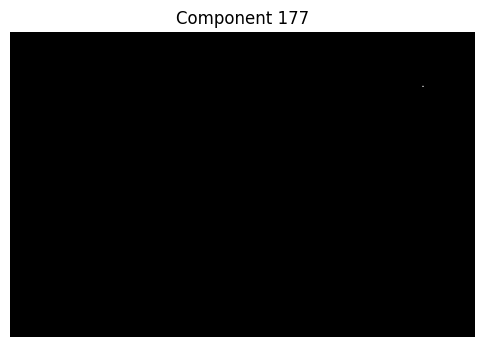

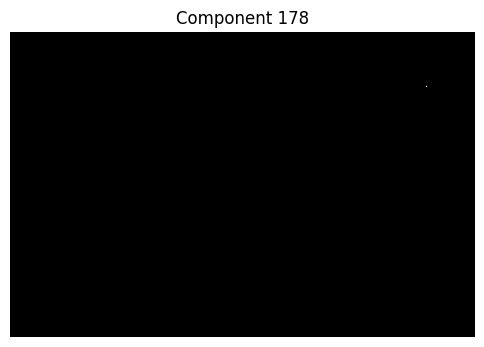

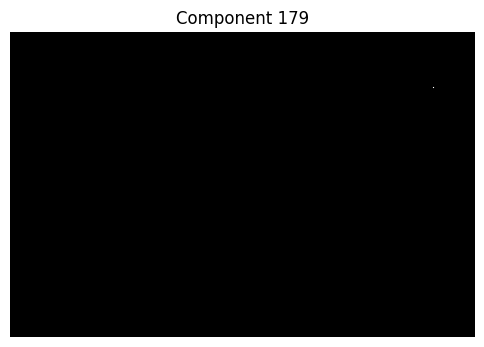

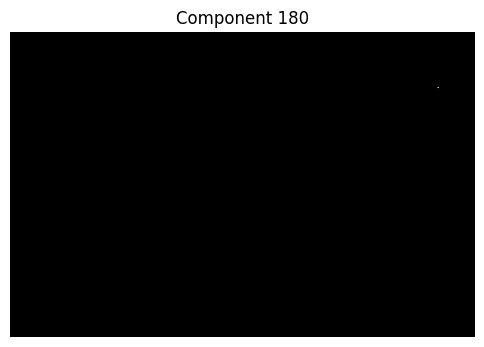

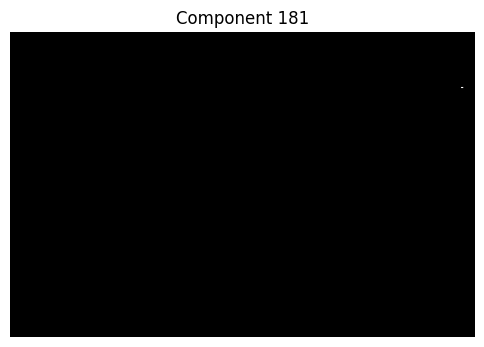

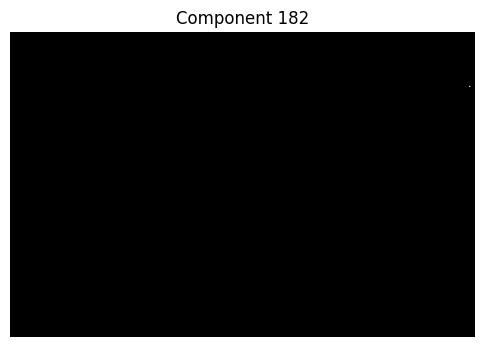

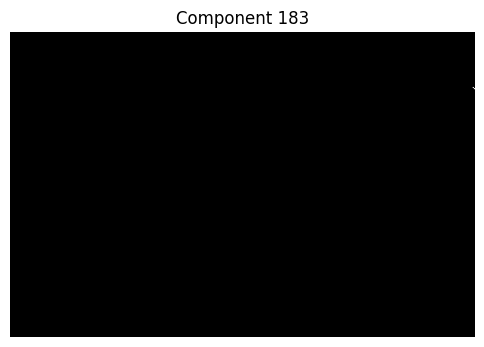

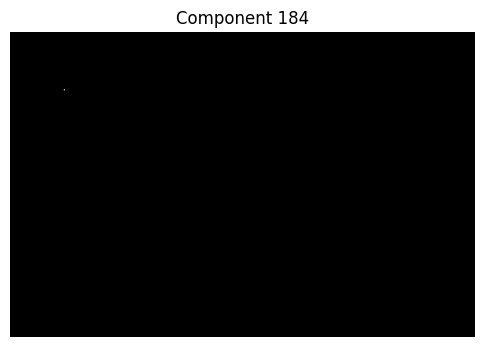

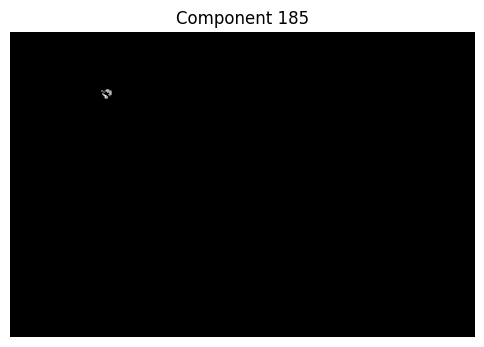

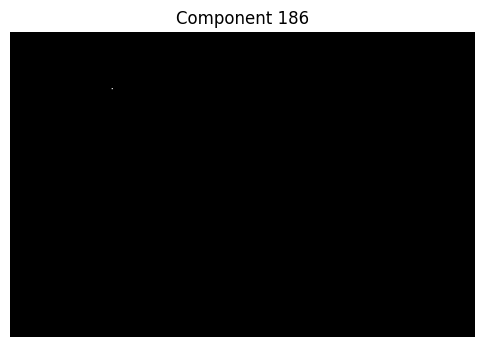

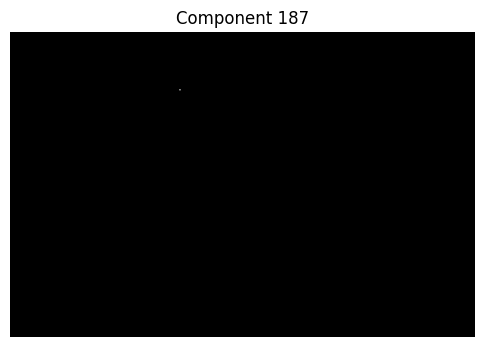

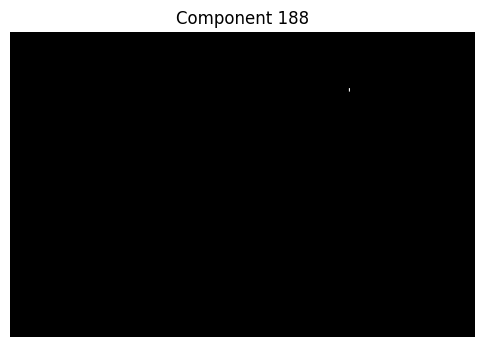

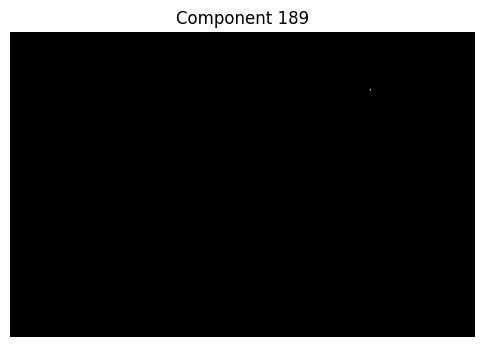

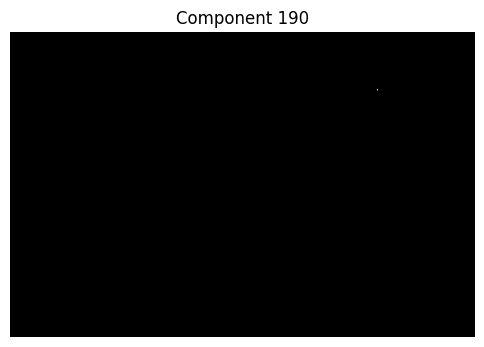

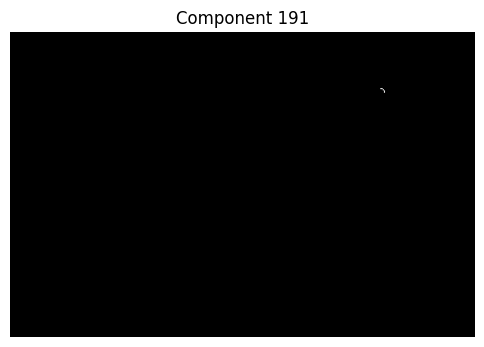

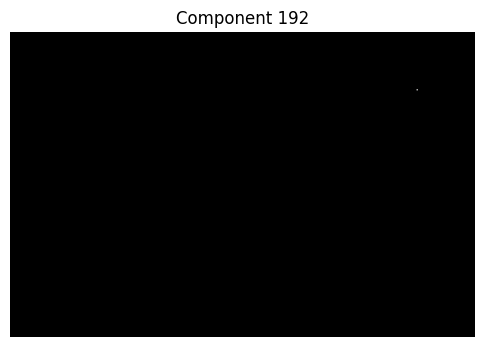

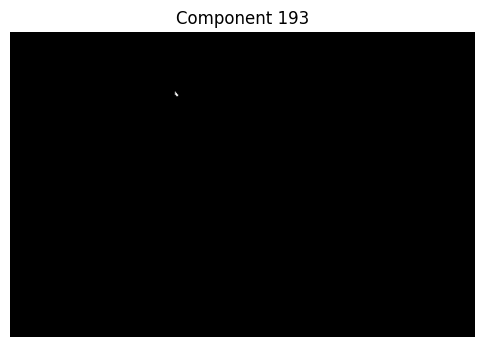

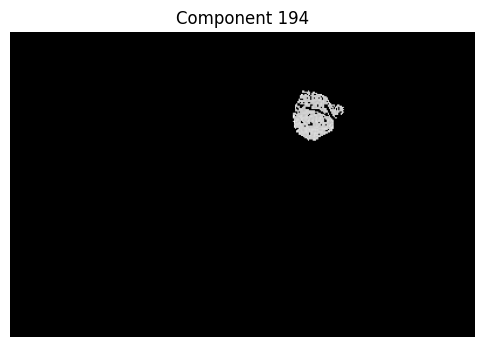

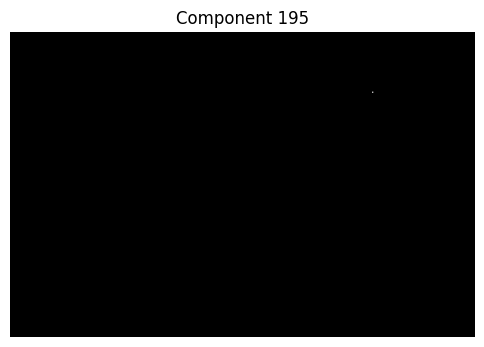

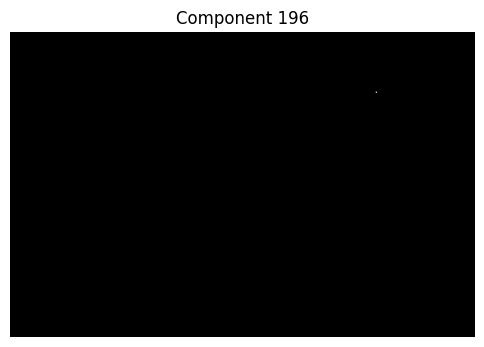

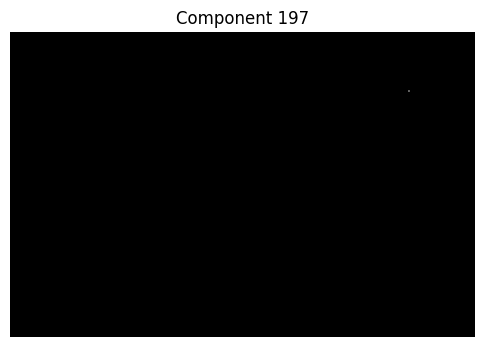

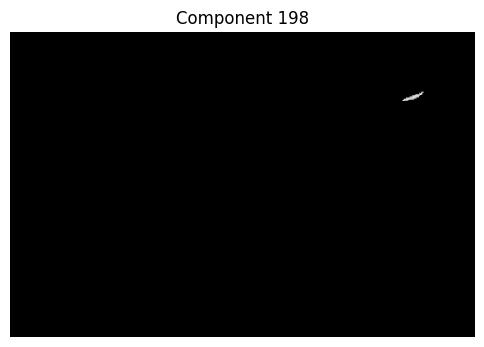

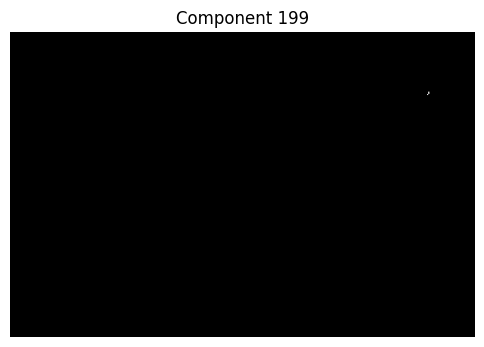

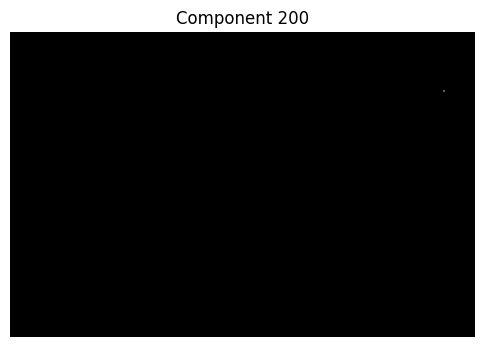

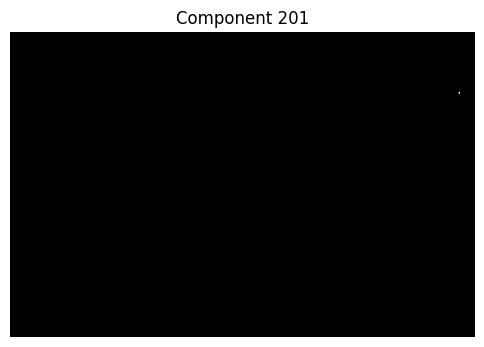

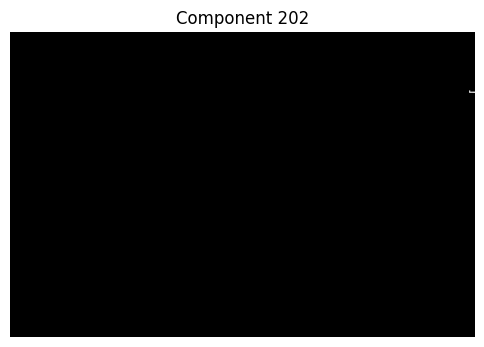

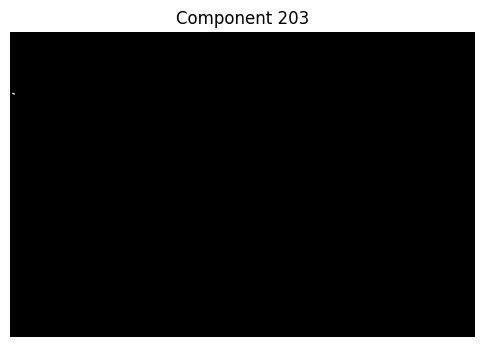

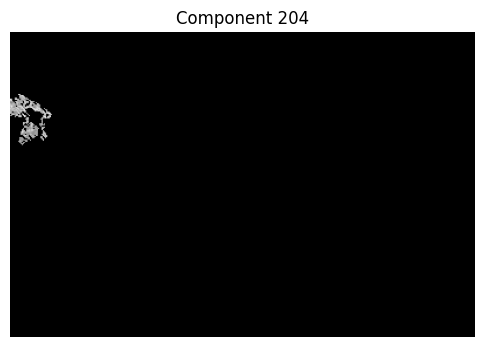

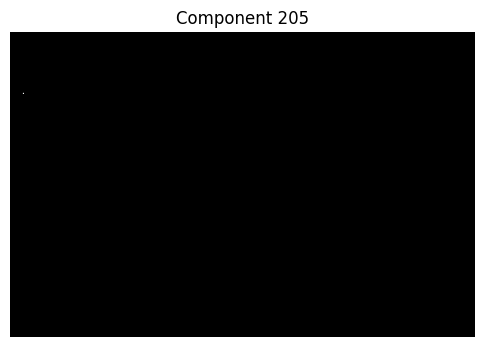

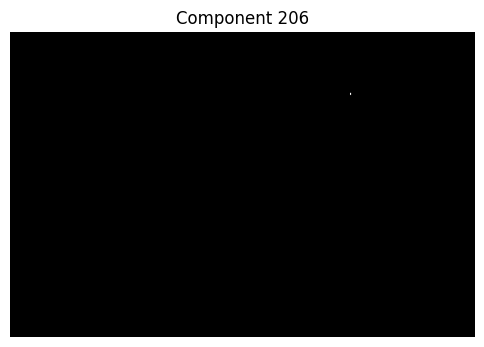

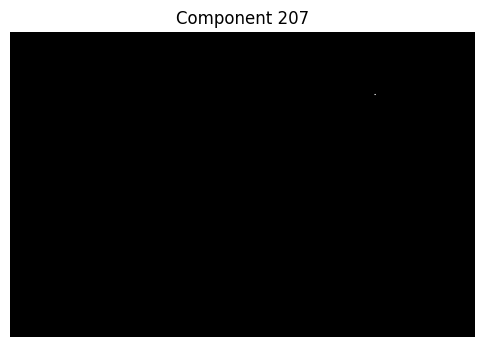

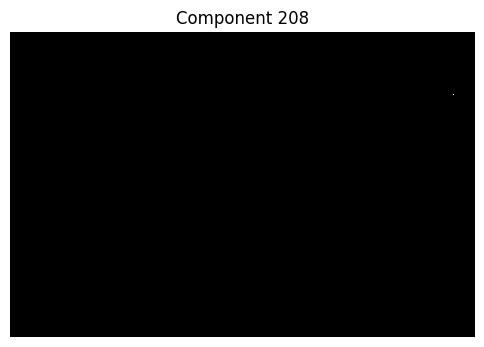

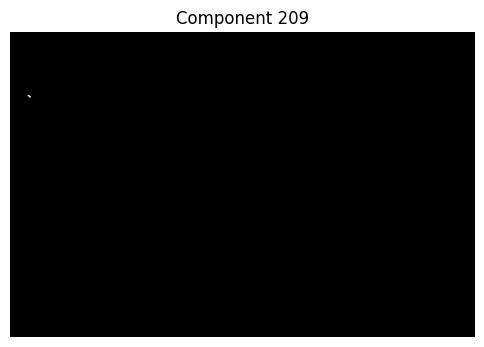

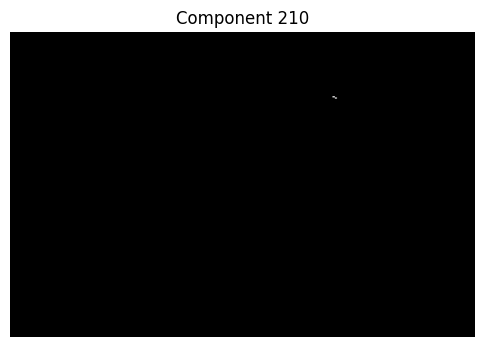

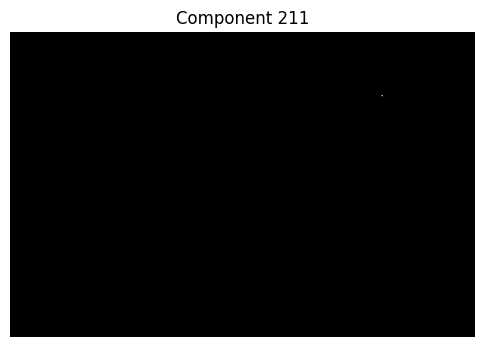

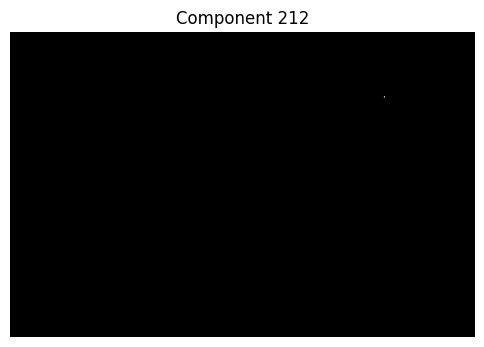

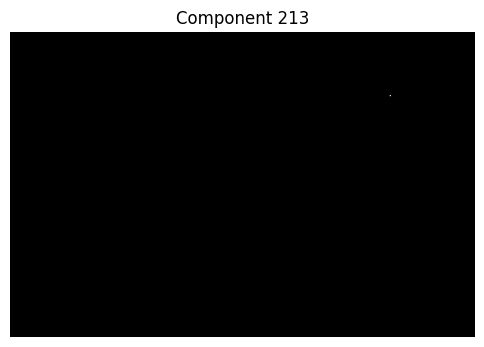

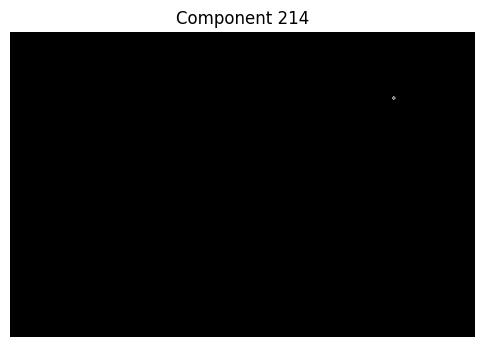

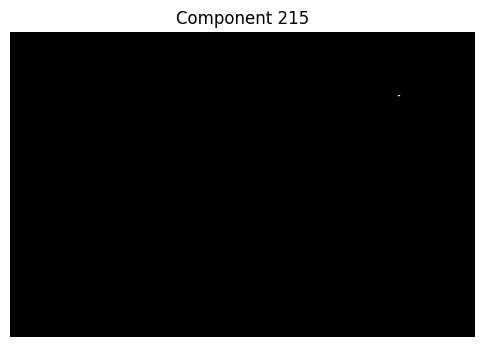

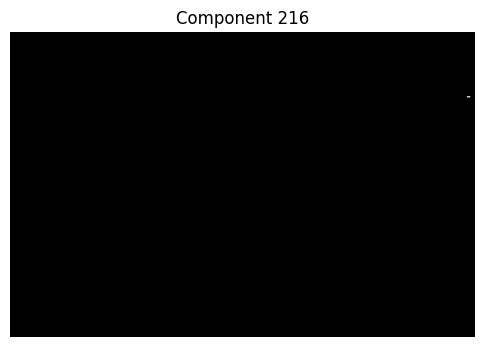

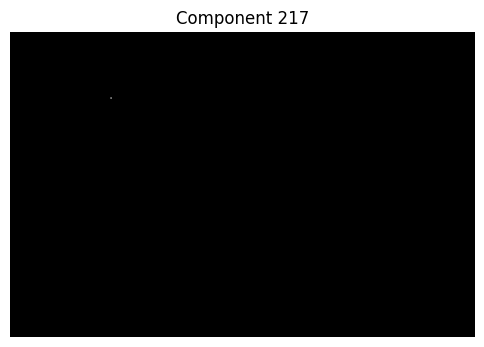

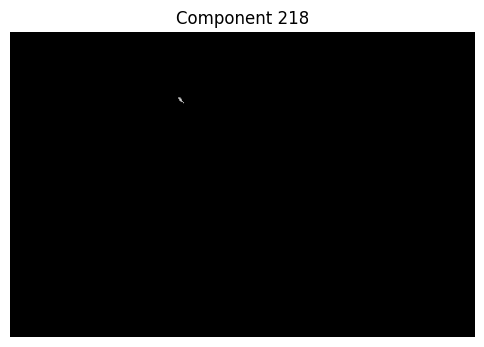

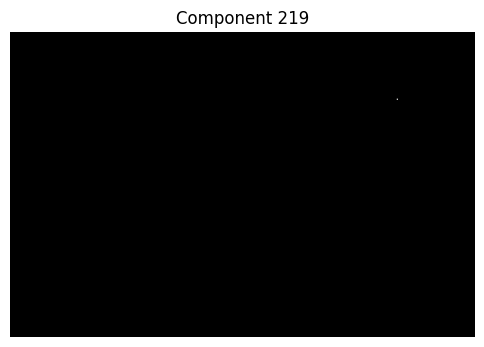

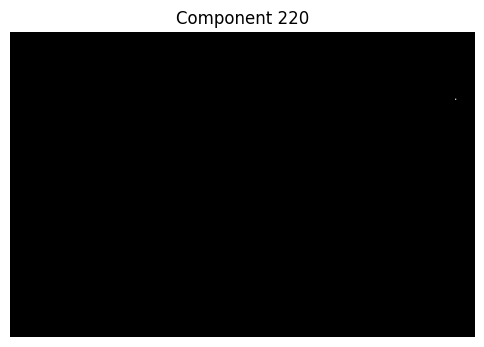

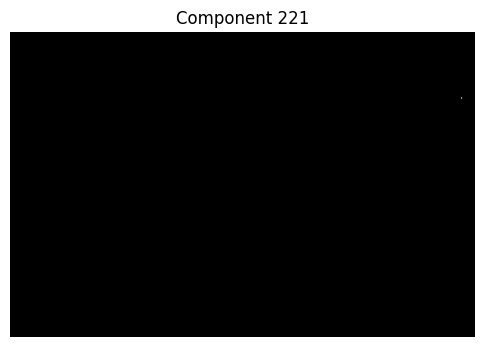

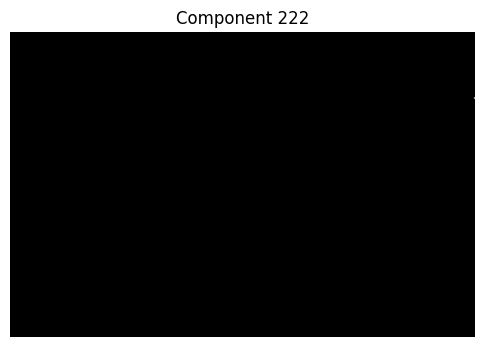

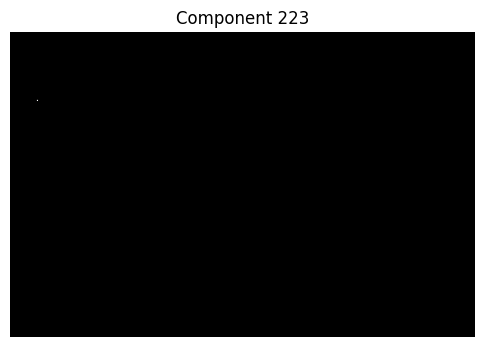

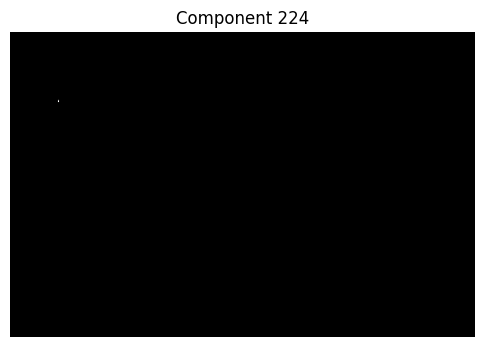

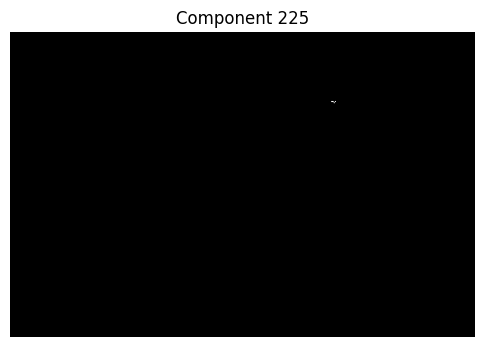

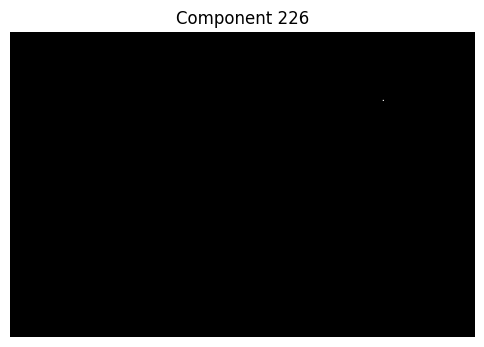

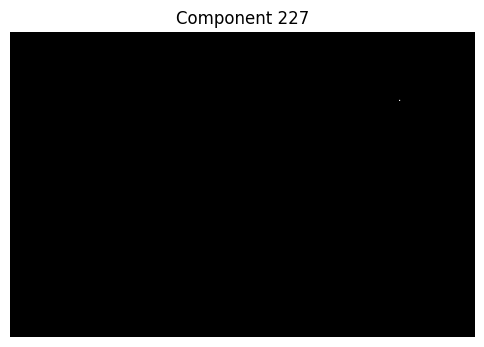

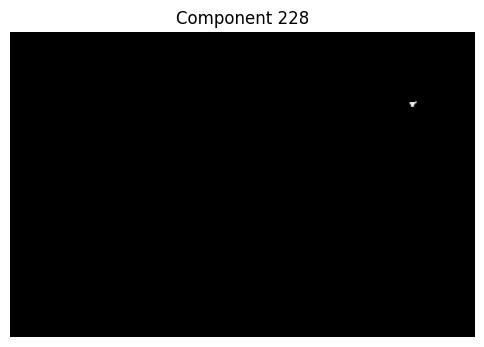

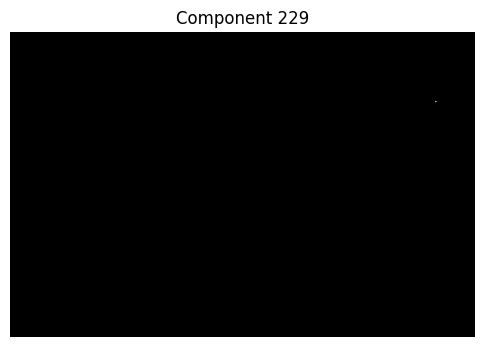

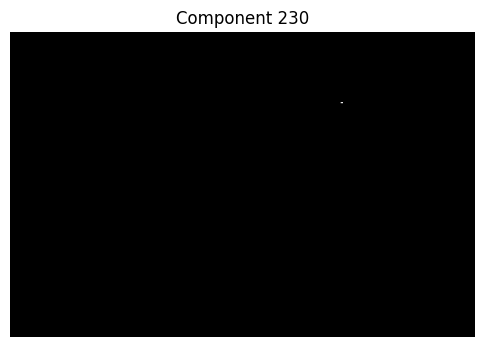

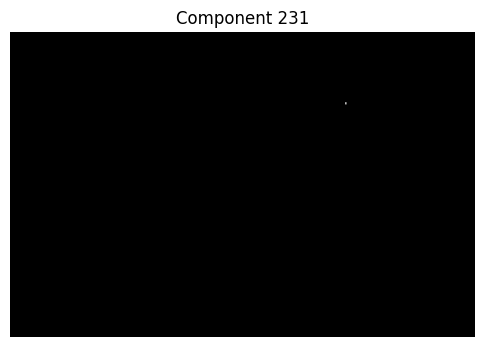

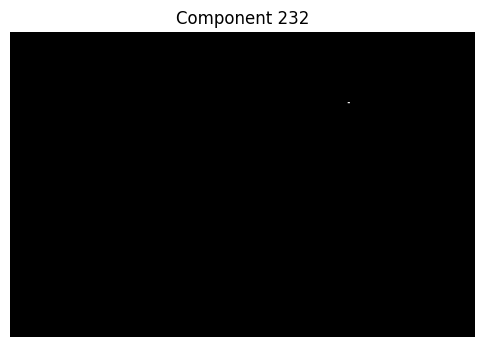

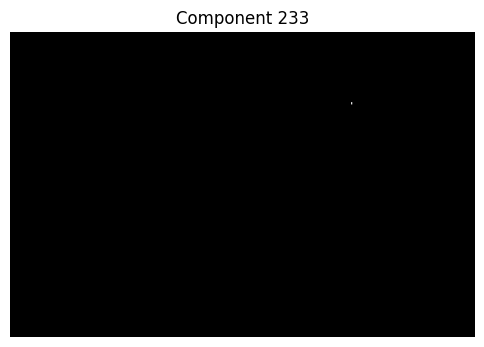

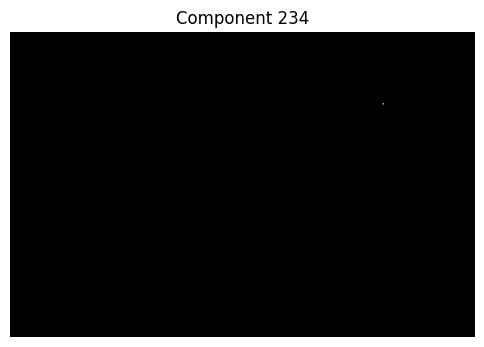

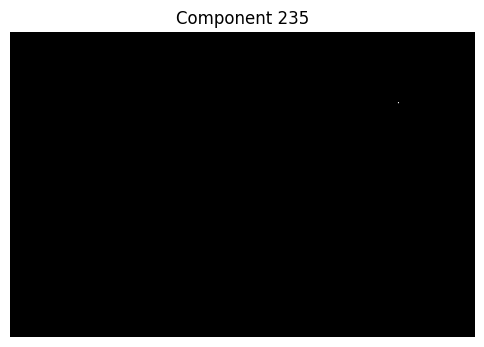

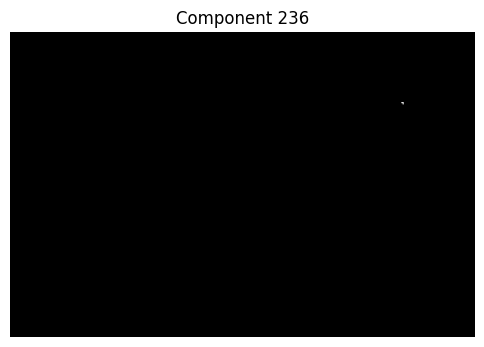

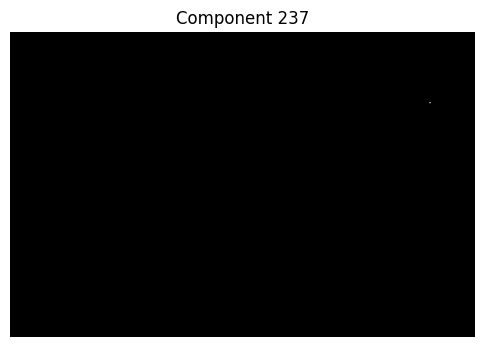

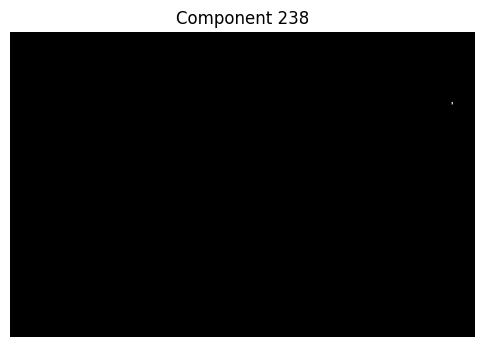

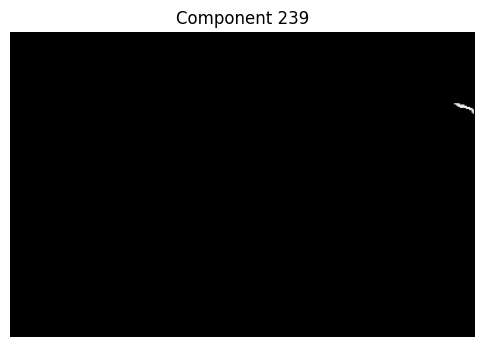

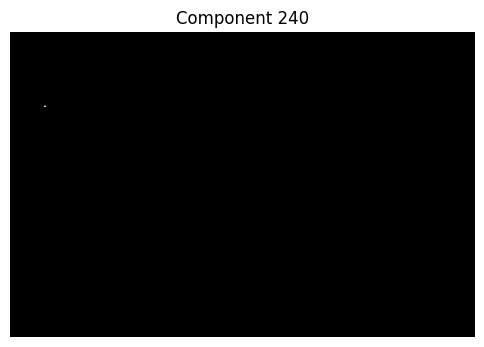

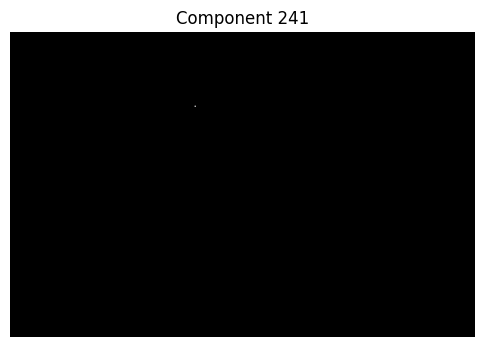

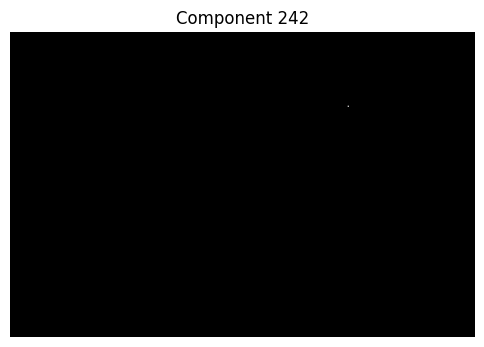

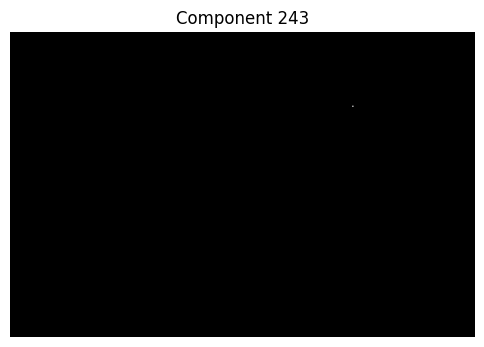

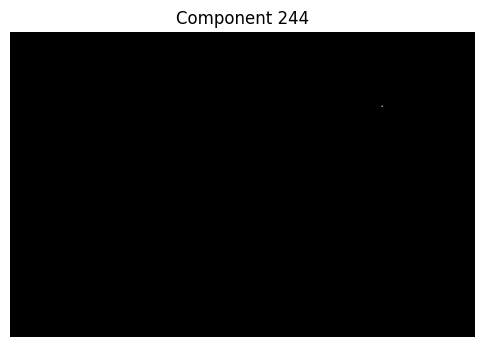

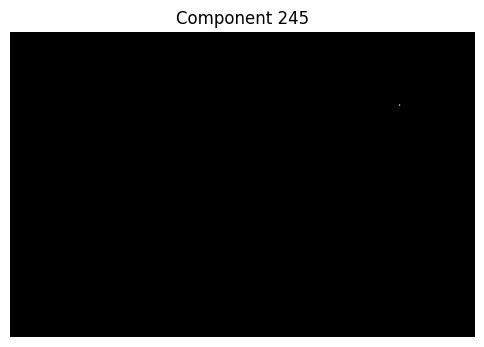

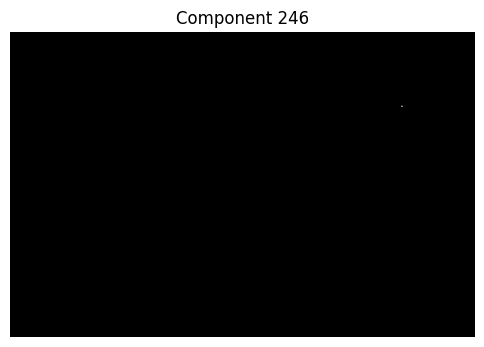

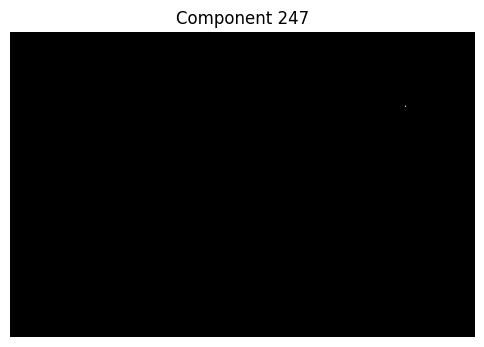

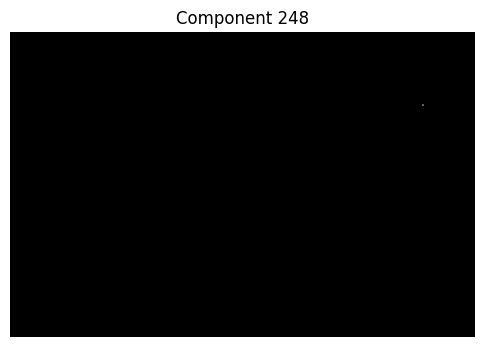

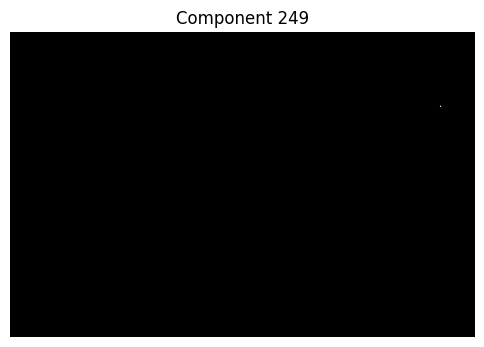

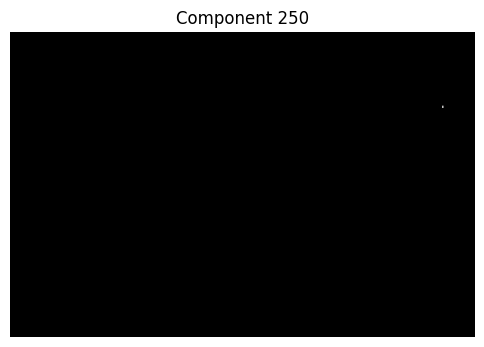

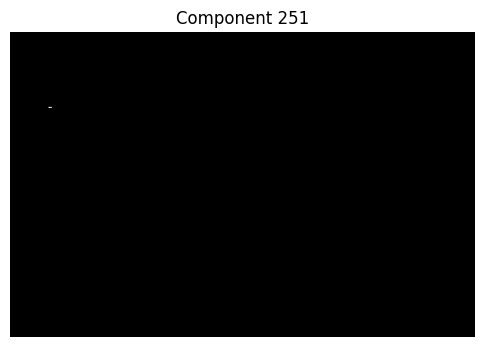

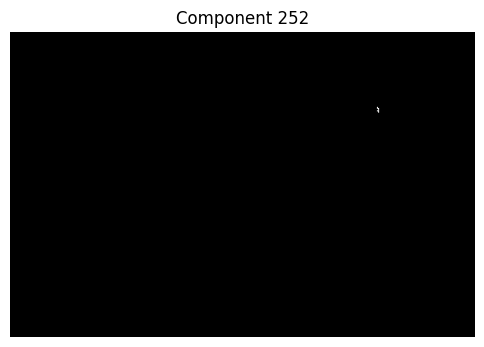

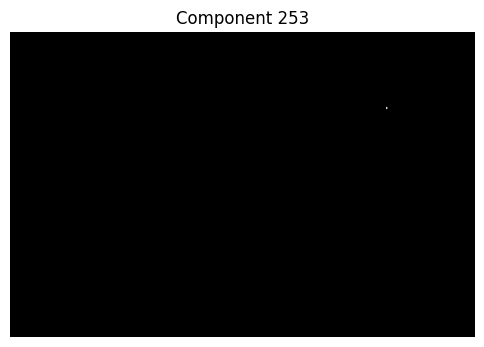

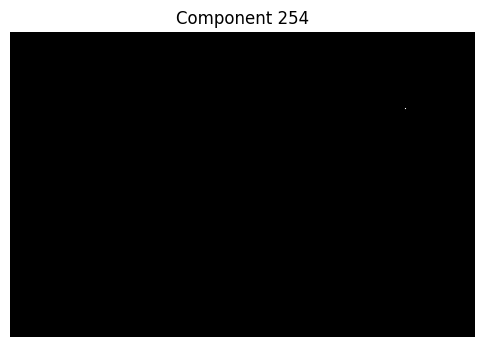

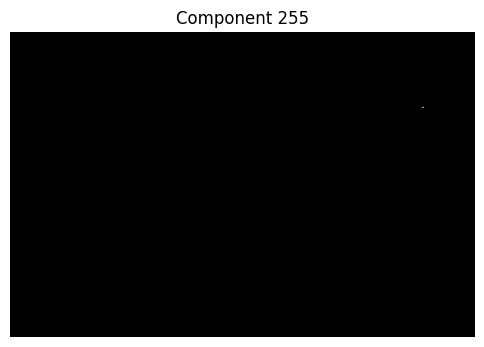

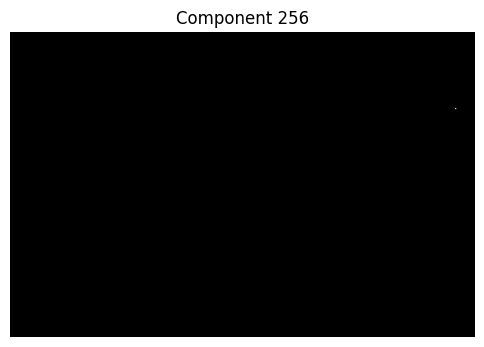

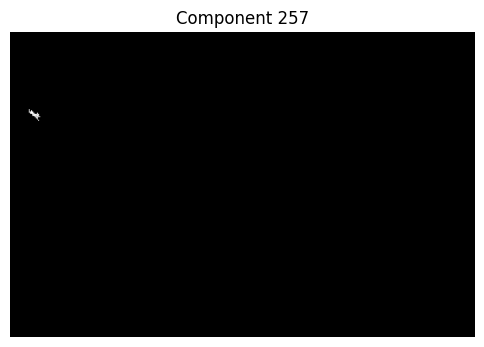

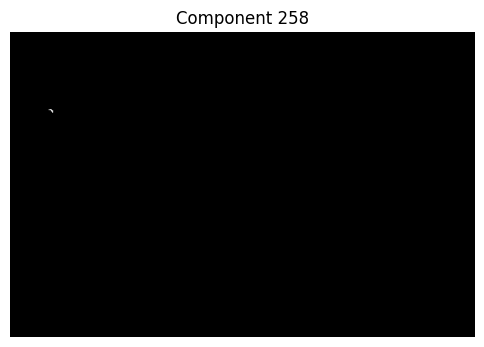

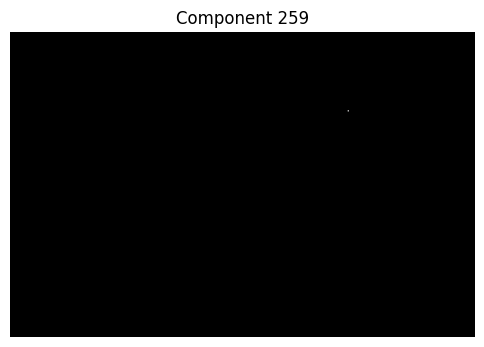

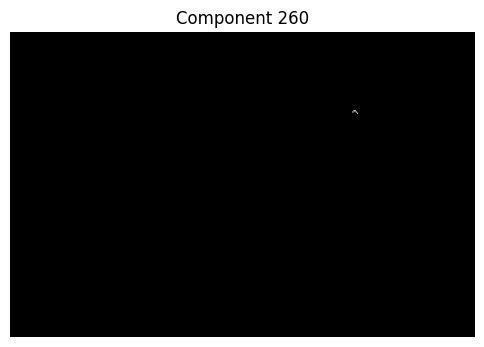

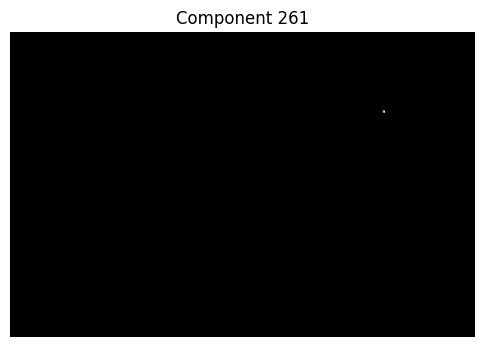

KeyboardInterrupt: 

In [18]:
print("\nAnalyzing Image 2:")
stats_image_6 = analyze_image_components(image_path_7)

##Explanation of Key Steps
1. Thresholding:
- Converts the grayscale image into a binary image for segmentation.
2. Connected Component Analysis:
- Identifies connected regions in the binary image and labels them.
3. Statistics Extraction:
- **Area:** Number of pixels in each labeled component.
- **Integrated Density:** Sum of pixel intensities within each labeled component.
4. Visualization:
- Colored labels for different components.
- Individual component highlights.

##Output and Inferences
1. Number of Components:
- The code prints the total number of labeled components excluding the background.
2. Statistics:
- A table displays the area, integrated density, and centroid for each component.
3. Visual Analysis:
- Labeled components are displayed in distinct colors.
- Individual components are highlighted to observe their structure.

##Key Achievements
1. Component Detection:
- Successfully identified and labeled multiple components in the image.
2. Quantitative Analysis:
- Extracted meaningful statistics like area and integrated density for each component.
3. Visualization:
- Generated clear and informative visualizations to support analysis.
4. Adaptability:
- The code can be easily adapted for other Earth Science images, making it versatile for various applications.

##Conclusion
This assignment demonstrates the use of image processing techniques such as thresholding and connected components analysis for extracting and analyzing labeled regions in an Earth Science-related image. The methodology provides insights into the spatial properties of the components and their intensity distribution, making it a valuable tool for geological and environmental studies.

---
